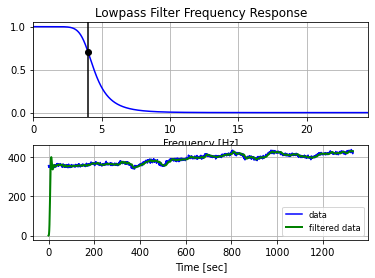

In [49]:
# https://stackoverflow.com/questions/25191620/
#   creating-lowpass-filter-in-scipy-understanding-methods-and-units

import numpy as np
from scipy.signal import butter, lfilter, freqz, cheby1,iirfilter
from matplotlib import pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = 356.09,349.18,355.1,348.28,350.14,347.14,353.96,357.03,355.46,354.6,352.75,350.42,350.53,351.3,358.13,356.82,356.6,358.02,342.35,347.51,356,354.89,355.61,354.87,346.31,352.87,360.77,358.4,356.61,359.1,360.67,348.63,354.82,355.67,361.27,359.69,366.1,361.13,358.23,362.76,366.76,359.93,353.06,356.77,353.78,363.94,362.45,357.92,357.37,357.86,360.94,366.33,363.48,359.68,358.13,359.11,360.86,356.84,350.43,351.42,350.13,347.76,352.76,356,364.79,356.05,358.97,355.38,357.72,349.28,359.45,353.33,358.79,347.74,353.63,348.28,347.83,351.99,357.95,361.36,354.19,348.71,353.86,352.42,359.96,345.3,349.6,354.63,363.75,358.05,356.35,351.26,349.33,351.27,346.4,351.26,356.64,347.69,355.54,350.17,361.46,351.8,351.03,356.17,358.35,354.68,354.07,354.97,356.92,352.98,351.16,357.58,359.02,354.95,349.35,351.28,351.86,356.56,349.99,362.6,355.4,359.57,356.71,353.79,357.47,355.41,352.3,355.66,359.61,349.69,363.63,357.72,352.55,366.03,351.92,357.6,355.51,354.85,356.86,349.61,357.42,353.92,355.39,356.47,357.95,361.55,355.08,358.04,355.65,361.75,365.1,358.83,358.07,360.44,355.91,355.93,358.61,353.67,354.62,353.71,359.95,351.44,356.64,356.11,363.54,357.51,368.18,360.16,356.87,358.1,354.33,358.87,362.78,356.42,364.75,362.22,355.16,360.39,362.43,366.38,358.85,365.96,361.48,363.27,370.71,366.79,374.8,363.21,364.09,367.97,370.45,364.67,366.85,365.17,364.32,370,367.34,364.84,365.31,360.79,370.29,368.12,356.47,371.43,369.12,365,371.58,376.58,365.94,370.13,366.99,370.79,366.8,368.76,364.1,368.83,363.33,361.22,364.54,367.11,364.08,361.15,357.73,362.96,359.4,360.9,372.02,360.85,357.92,358.9,360.25,359.34,359.98,353.92,362.5,365.15,356.88,361.66,364.17,361.78,360.36,358.03,361.38,366.9,359.27,367.38,364.37,364.91,359.7,368.4,362,362.08,378.29,365.22,364.22,361.1,359.6,360.39,370.06,364.92,366.06,366.28,360.72,362.27,361.64,367.33,362.37,362.82,364.96,365.5,370.62,358.93,361.74,356.86,368.14,365.4,360.21,369.21,362.67,356.89,361.66,364.16,360.2,358.51,359.43,360.18,361.8,363.59,364.44,368.08,361.06,367.73,359.11,361.95,362.76,359.91,357.64,367.51,362.59,362.65,358.08,363.79,365.17,356.08,359.53,361.85,362.45,371.09,364.44,373.3,371.28,369.12,370.16,380.09,377.4,381.17,369.83,373.5,373.74,370.29,368.15,368.03,374.13,366.18,376.26,371.61,374.92,375.38,377.22,375.32,369.71,369.07,367.95,370.37,363.66,365.1,374.11,364.11,371.77,363.06,370.17,376.02,370.72,367.61,367.37,369.95,375.9,371.91,361.16,361.46,360.97,363.11,367.87,364.07,357.89,365.98,364.08,366.01,363.76,360.48,355.78,350.39,343.82,348.45,350.9,354.13,344.16,352.49,341.2,341.31,347.35,340.8,351.77,352.19,352.24,341.2,338.49,351.56,357.21,354.25,351.08,348.75,346.36,350.75,355.41,351.08,350.25,356.29,353.3,355.79,350.33,352,355.58,356.81,359.8,356.34,358.01,358.82,359.16,363.39,362.2,364.62,359.53,365.82,364.27,366.61,363.92,357.64,355.52,356.65,370.58,366.76,373.4,369.21,364.84,370.18,365.77,374.02,373.39,377.42,372.89,373,368.44,375.04,377.23,382.86,374.21,373.84,382.62,373.34,381.07,376.16,368.95,385.44,375.09,386.13,382.9,382.54,385.61,382.63,380.97,383.52,389.63,384.39,373.86,368.49,379.14,375.73,389.43,382.13,380.02,373.19,387.02,381.03,371.04,374.61,384.01,376.35,381.56,377.67,391.23,378.98,384.39,373.49,383.21,377.02,384.78,377.13,381.54,382.88,376.63,381.13,369.01,367.98,374.1,375.01,386.6,377.09,374.44,372.49,373.99,375.92,372.23,367.59,358.77,370.22,365.5,369.79,358.25,365.1,362.79,355.15,370.59,359.74,357.04,359.17,355.31,354.89,354.24,360.98,357.25,352.9,360.95,355.18,359,353.97,354.65,357.41,362.16,364.88,360.26,359.62,366.13,373.35,362.93,381.09,370.61,368.83,372.79,377.88,379.3,375.63,379.04,374.27,372.67,371.41,375.31,380.57,382.31,388.47,384.82,386.76,383.33,378.93,389.16,390.61,391.88,382.67,390.86,390.91,385.89,387.8,386.53,390.47,387.22,391.9,380.1,387.43,383.63,382.05,381.47,380.98,384.39,393.35,386.67,386.76,378.98,384,388.39,384.24,376.62,385.27,394.47,387.19,387.79,381.32,393.59,384.47,385.26,388.38,376.47,381.97,391.55,388.23,387.2,392.31,380.97,383.3,387.84,393.82,387.19,384.68,393.18,381.97,383.28,392.84,385.6,389.99,390.14,383.17,384.09,387.67,387.7,392.1,389.2,387.91,387.95,386.45,381.79,391.24,388.43,391.16,393.26,398.29,393.94,388.79,391.11,394.66,394.34,389.3,390.46,395.4,409.6,400.46,398.95,400.58,396.79,401.69,405.29,399.3,392.09,400.87,397.52,403.12,397.68,398.4,405.93,401.56,395.05,391.04,397.79,396.22,396.79,396.61,397.63,395,390.74,398.1,398.71,396.49,405.42,394.89,397.4,394.74,394.9,395.81,390.08,400.98,397.23,407.63,391.55,392.34,389.41,396.63,394.58,401.98,394.95,394.51,395.08,394.13,403.91,400.18,393.23,400.61,401.4,396.99,408.52,400.79,394.22,389.2,400.13,397.56,399.95,391.99,393.8,406.03,396.52,393.59,401.09,401.92,408.31,409.04,405.28,411.55,416.41,404.31,407.32,414.37,412.13,410.78,412.27,416.32,405.96,414.88,405.29,412.56,403.59,412.62,407.18,409.27,406.39,405.5,410.56,408.89,404.65,409.35,407.26,399.35,403.43,405.64,407.84,401.89,403.93,402.54,404.43,400.42,403.73,397.45,404.73,406.92,403.1,401.73,401.99,399.54,401.65,398.5,405.93,398.29,402.06,400.42,398.99,390.05,408.4,395.96,400.57,401.38,406.35,402.65,403.7,402.73,398.76,403.83,406.52,407.36,401.25,406.48,400.21,404.49,403.9,403.79,401.19,405.39,402.28,402.71,405.58,409.42,397.5,411.49,407.16,414.55,405.55,405.78,412.84,409.6,406.87,413.82,410.51,411.47,404.6,407.17,414.18,408.17,417.32,417.27,414.27,411.96,417.2,412.19,407.51,405.85,410.92,411.48,417.67,414.4,410.68,412.45,410.11,418.04,420.42,414.24,414.38,415.49,406.06,417.66,417.02,411.18,417.68,419.68,421.31,418.36,429.05,420.24,431.52,422.54,429.24,434.67,419.16,425.78,428.25,420.79,422.86,420.61,420.01,418.61,411.43,413.66,416.1,423.31,415.03,410.01,419.69,406.31,420.98,423.03,422.92,417.7,412.17,418.1,418.49,421.79,420.7,419.56,422.29,415.13,420.18,413.93,416.7,412.25,414.22,413.83,413.09,409.18,410.58,411.27,410.21,417.95,416.66,411.4,416.36,403.96,403.98,414.92,407.99,399.07,395.17,391.84,402.17,400.42,394.22,385.54,388.93,391.48,396.03,394.95,393.52,397.02,397.04,396.65,401.26,400.59,397.63,403.55,392.68,399.85,393.53,396.93,393.58,400.31,406.6,400.76,399.86,404.21,396.65,395.46,398.31,404.38,392.38,388.79,403.44,400.91,392.44,399.55,399.72,401.22,392.23,393.47,401.18,393.84,385.34,387.59,386.65,387.1,393.53,387.5,390.1,390.42,394.45,384.75,387.06,395.96,395.8,392.59,381.61,392.41,402.22,395.05,401.83,399.97,398.69,393.03,388.93,402.85,401.22,397.24,391.24,395.62,393.64,403.59,399.55,403.13,394.31,399.19,396.86,400.52,397.04,401.05,390.62,394.96,398.93,407.7,398.48,400.63,399.64,394.62,400.77,399.07,403.15,406.05,402.28,403.57,410.19,413.78,405.04,411.77,408.95,412.43,407.72,414.6,415.08,419.4,420.92,422.12,418.95,418.13,416.86,425.69,417.67,425.22,424.09,426.91,418.49,426.07,430.04,434.83,425.76,428.51,425.13,417.61,422.12,421.19,421.65,433.88,420.74,422.51,424.9,422.98,415.42,419.84,423.89,429.76,432.79,425.79,424.78,426.55,426.64,420.96,424.95,422.08,422.94,428.78,420.98,423.37,422.92,421.5,422.14,429.78,427.05,421.96,422.02,424.48,426.36,426.77,426.81,419.42,413.86,412.49,425.82,419.21,417.32,422.38,414.76,412.09,412.31,411.58,409.47,407.12,411.35,415.82,409.74,415.93,413.81,410.49,411.17,408.12,413.75,420,413.04,408.91,409.99,405.64,407.49,411.16,417.63,412.27,411.12,406.02,408.3,410.13,408.62,410.84,409.05,404.41,408.15,416.77,403.03,404.76,411.81,413.77,413.56,405.39,412.04,412.57,415.15,418.36,409.56,413.97,413.37,419.35,413.05,414.96,407.09,410.69,416.74,411.01,410.91,409.24,413.3,415.9,417.24,414.15,407.64,410.89,415.82,418.81,410.72,417.18,411.42,415.05,406.42,405.52,405.22,409.9,403.23,406.82,398.23,400.44,408.88,403.91,404.69,403.4,409.92,406.31,403.08,403.65,397.19,407.62,398.38,401.93,402.54,406.3,397.79,399.88,403.77,403.15,403.82,399.72,402.29,405.15,401.64,409.45,397.12,406.28,397.25,398.46,400.83,396.79,405.12,395.31,396.85,395.39,399.03,401.69,396.63,397.14,398.13,409.68,397.9,395.98,395.15,399.16,401.76,397.64,395.69,398.38,401.56,391.84,395.19,386.51,397.13,405.65,401.71,396.45,399.3,394.98,402.71,397.12,394.77,402.44,401.75,403,401.29,403.88,399.03,403.82,395.85,397.84,401.22,407.69,404.63,409.67,410.91,404.93,408.08,402.96,412.75,414.96,406.65,411.1,416.41,406.95,409.32,420.58,414.48,419.71,415.74,411.07,421.54,420.37,411.94,415.41,411.56,421.21,423.24,415.53,419.34,420.01,415.95,411.15,416.56,416.94,415.65,415.91,412.07,416.25,418.55,418.69,418.92,418.7,416.37,419.07,411.39,422.3,412.85,412.83,420.28,414.04,413.35,412.56,416.88,414.26,413.1,421.12,418.16,420.58,422.5,414.14,416.45,420.29,423.65,421.74,417.45,425.99,431.47,429.91,425.24,421.13,419.42,420.27,424.99,424.93,423.96,422.25,415.69,418.28,419.2,418.57,414.56,422.58,414.69,420.29,419.51,418.14,419.33,418.45,419.67,420.58,428.16,415.14,416.53,420.13,413.1,421.21,420.3,424.67,423.96,423.68,424.43,411.62,417.72,418.92,415.9,417.93,420.83,424.44,421.88,428.5,426.56,422.01,422.58,420.15,427.57,431.62,427.66,427.37,421.54,423.97,423.87,429.84,424.89,425.26,416.9,429.16,423.43,416.57,426.51,417.8,419.96,416.69,425.68,412.7,421.7,420.12,420.78,423.7,422.05,423.88,432.72,419.65,430.07,429.68,425.36,423.89,433.51,425.18,429.19,429.04,433.6,433.61,432.7,427.73,424.31,432.7,422.52,426.13,437.99,435.12,423.52,430.49,429.96,428.26,416.95,431.13
,433.76,429.19,429.6,436.27,437.96,432,427.93,433.8,426.65,435.08,435.16,431.18,437.3,428.2,425.63,431.81,428.12,444.88,432.93,430.77,439.92,432.8,430.41,429.62,430.15,435.28,439.09,437.69,438.81,435.13,432.87,435.14,435.21,430.51,435.77,433.25,436.78,433.25,429.66,428.66,435.66,430.16,435.81,435.48,434.91,428.65,436.52,439.39,430.3,440.89,436.52,432.57,432.1,443.48,442,435.39,441.29,439.2,439.33,437.51,440.29,440.72,435.41,433.27,431.36,432.18,437.75,440.34,431,437.77,432.24,429.66,428.99,423.98,426.95,429.22,426.68,425.66,426.93,427.95,431.71,429.77,433.66,431.88,428.77,434.6,430.58,420.85,431.98,426.34,429.78,424.97,426.1,429.99,420.64,434.4,434.99,428.05,428.36,420.88,425.3,422.2,419.64,434.78,424.65,419.96,428.69,425.42,428.25,424.36,420.01,420.33,426.48,432.06,422.37,425.88,426.1,425.06,425.83,424.91,428,429.68,423.36,418.85,420.14,416.67,415.84,413.19,419.39,413.86,412.53,420.76,424.57,422.8,418.58,414.95,416.06,419.57,418.11,417.47,419.72,419.79,418.46,415.33,419.75,409.38,410.76,419.34,418.27,416.91,427.5,420.27,422.92,417.26,418.31,413.1,419.57,415.74,410.1,410.87,414.77,408.96,418.13,415.87,423.71,425.21,415.95,424.56,416.46,421.12,421.02,426.85,416.93,423.66,423.94,430.15,417.09,424.76,429.9,424.89,419.36,425.44,421.17,425.2,421.62,421.54,425.61,420.66,422.92,423.33,425.07,423.27,427.34,422.73,423.24,421.81,424.13,423.27,422.04,422.4,424.79,424.17,423.37,422.73,423.23,422.67,427.44,421.28,420.26,425.66,421.06,422.33,417.1,418.25,419.81,413.26,410.8,422.09,416.75,417.42,422.74,420.17,420.74,421.33,418.14,412.99,412.04,413.36,411.05,404.58,413.1,411.61,415.46,413.29,419.12,415.18,422.15,415.44,420.4,412.65,405.52,410.01,403.73,406.67,408.71,410.31,405.04,407.62,413.84,409.03,408.06,412.78,410.45,406.7,411.14,404.32,405.48,408.52,412.35,411.72,403.51,402.3,394.43,404.28,401.38,404.45,393.53,408.55,401.28,410.07,402.88,404.52,397.3,405.4,405.9,402.74,411.73,405.38,401.45,400.61,396.97,401.35,407.12,414.21,396.48,408.19,397.63,398.57,404.77,399.55,402.64,410.36,404.43,407.27,402.79,408.89,402.14,404.8,395.5,401.14,400.91,399.31,399.37,399.51,408.35,411.6,410.36,405.21,404.25,403.94,409.13,412.7,403.34,407.57,408.25,404.58,408.92,413.58,409.42,402.79,415.27,412.92,414.68,411.54,413.05,413.7,408.57,407.96,407.37,415.52,411.01,410.9,411.48,407.04,416.32,412.64,416.83,410.98,413.39,413.16,413.9,410.14,417.63,415.76,412.02,397.92,407.11,407.76,410.66,407.69,411.57,413.65,408.05,409.7,407.6,412.56,403.85,411.46,407.64,415.45,414.6,413.76,405.57,409.02,409.26,412.04,404.36,413.55,407.17,401.71,405.2,404.09,413.28,409,411.55,407.9,404.3,407.92,411.18,410.63,406.04,411.91,410.14,413.36,406.66,409.06,413.61,410.16,415.19,420.26,416.15,408.71,413.5,414.42,421.22,416.36,417.73,416.57,417.71,419.85,413.53,418.38,418.11,410.3,420.18,422.91,418.39,416.13,415.28,418.61,417.32,420.38,415.55,414.12,415.15,414.95,418.86,409.54,416.62,416.8,418.96,411.53,413.4,416.18,411.11,414.92,416.78,419.27,423.25,422.13,422.41,420.57,425.13,418.12,417.2,422.44,420.17,416.45,424.38,423.04,418.78,416.69,421.62,418.54,417.57,419.97,428.07,417.77,420.92,418.99,418.84,425.32,418.51,417.53,425.56,421.87,411.89,420.66,416.25,417.51,423.72,418.78,422.12,414.23,411.27,415.28,410.5,421.74,412.2,414.67,410.72,418.44,406.58,415.08,408.58,416.15,408.35,410.65,403.09,412.67,411.77,408.72,406.14,418.18,409.46,415.05,417.02,410.62,409.87,409.06,407.47,403.31,404.51,413.3,411.94,411.73,405.2,408.79,408.01,404.1,406.85,412.07,412.56,406.08,406.66,411.41,407,413.94,412.69,404.98,409.85,421.66,412.46,411.72,412.38,417.69,420.27,407.35,417.11,413.76,412.97,412.57,414.71,426.2,413.43,416.87,420.21,421.19,424.17,424.78,429.81,426.96,430.87,429.59,426.28,435.73,426.73,428.25,431.08,425.29,430.4,437.57,434.94,433.94,431.2,433.78,429.82,437.89,430.05,436.31,434.18,430.5,433.04,438,435.48,428.94,438.28,433.26,428.47,434.06,431.67,428.05,426.95,422.76,431.8,423.15,423.05,434.85,418.39,433.37,430.82,423.72,433.42,421.65,435.98,426.34,422.4,424.44,425.8,429.5,426.19,422.1,430.14,424.76,429.95,427.62,425.29,433.74,423.96,431.15,430.17,426.19,427.46,427.1,430.57,426.36,436.06,432.69,433.26,429.37,416.19,409.27,427.07,430.52,432.81,433.39,432.71,439.12,432.73,433.96,425.04,434.56,422.47,426.21,437.78,435.9,435.43,438.73,428.57,435.03,441.25,438.02,442.62,436.96,433.5,441.76,434.5,435.22,440.93,439,438.38,439.57,434.38,443.51,439.01,432.28,429.16,426.12,425.46,430.61,438.11,431.05,425.75,428.5,425.85,424.87,419.58,427.99,431.1,433.88,428.95,427.76,417.86,424.38,423.34,429.44,423.52,422.97,421.12,425.59,433.67,419.51,422.62,421.13,427.53,425.29,421.51,425.71,424.27,418.04,431.81,416.76,425.22,421.54,423.38,427.94,427.08,433.66,417.95,424.14,422,417.23,424.71,428.21,430.16,435.97,430.45,426.98,433.89,433.14,430.59,429.01,435.27,434.13,429.27,423.3,426.65,425.17,423.24,428.49,426.82,424.82,429.67,423.23,422.38,429.32,423.7,422.76,422.74,420.58,416.97,414.32,411.62,413.57,414.22,411.19,412.12,413.93,416.14,410.05,415.95,408.87,417.6,412.11,410.64,412.35,410.1,406.32,414.13,410.86,417.29,412.51,413.52,406.56,407.61,408.81,412.76,417.76,411.56,408.85,413.47,416.71,409.64,416.15,419.07,417.02,413.05,412.28,418.04,412.65,428.75,419.12,415.44,411.7,422.79,429.93,424.06,407.27,419.94,413.81,417.09,419.26,418.84,409.51,412.95,411.85,412.99,409.76,415.18,418.52,414.59,414.88,418.75,416.02,408.66,413.78,414.34,418.54,410.19,422.29,416.08,405.72,412.32,416.4,418.25,412.86,402.85,411.28,417.04,425.96,416.21,408.79,412.08,412.76,416.5,415.08,412.84,405.77,409.81,404.85,413.73,416.91,414.32,410.62,414.22,401.73,402.81,401.1,396.53,406.14,408.6,416.73,407.64,397.7,396.86,402.91,398.02,400.73,402.16,390.28,394.9,399.14,390.81,393.04,395.96,396.48,393.34,391.33,392.01,388.59,382.45,385.54,379.63,383.4,385.87,383.73,395.81,386.97,383.41,383.11,383.49,388.22,389.6,389.39,392.37,380.61,383.48,386.68,391.25,396.73,381.81,383.71,386.39,389.08,385.16,386.76,398.32,391.13,387.53,385.89,390.07,387.37,393.62,392.12,395.85,387.6,390.45,391,395.34,391.52,388.49,392.18,385.51,392.58,397.81,394.75,390.68,387.92,393.03,395.55,393.34,398.12,394.36,391.42,399.43,388.75,381.38,398.04,398.44,399.55,391.64,394.61,398.66,403.16,401.32,398.62,401.98,401.79,391.74,402.39,404.36,393.05,398.89,399.47,401.28,397.84,402.16,396.41,400.18,400.46,405.62,397.63,400.49,394.96,399.18,394.93,392.59,400.3,395.01,396.91,396.05,391.73,402.56,398.53,396.31,392.95,387.13,396.5,398.86,395.73,396.63,386.42,386.11,393.91,394.59,400.79,395.65,401.81,401.23,399.33,400.21,398.8,403.01,397.76,402.44,392.84,394.72,406.04,409.55,402.65,398.65,402.8,397.09,405.13,409.47,401.91,395.62,408.17,397.45,397.08,396.59,398.7,406.29,392.21,395.95,397.05,399,396.9,393.06,393.35,390.61,402.99,389.58,392.83,392.91,395.48,393.11,397.24,388.82,397.06,382.42,384.41,385.04,391.32,388.91,388.79,390.06,386.8,380.49,387.62,376.61,385.53,389.24,383.67,391.6,384.53,391.88,387.3,386.07,391.32,388.78,390.78,385.05,387.48,388.35,385.65,378.26,390.4,378.86,378.23,383.29,387.87,381.88,376.58,385.19,382.45,376.31,386,384.63,374.53,381.12,372.23,372.82,380.22,371.29,379.01,373.32,376.44,380.06,374.74,375.37,375.61,379.9,370.67,366.2,371.89,375.09,368.6,378.16,377.51,377.09,378.94,386.83,384.45,380.13,382.83,379.05,380.62,377.5,382.3,382.55,383.7,380.68,385.4,385.18,383.51,381.45,378.83,384.43,386.44,380.87,371.45,378.48,375,385.13,382.67,385.73,393.36,384.61,387.67,386.42,384.69,388.88,386.27,386.76,388.28,386.36,383.39,382.18,384.92,379.89,381.12,378.6,382.32,383.22,377.94,382.71,386.76,378.88,385.9,388.51,391.68,396,383.5,389.69,389.19,389.23,389.86,394.94,382.43,388.35,388.31,392.49,398.46,397.76,388.02,389.9,387.77,388.85,392.53,388.64,387.97,391.09,390.7,388.22,393.46,403.51,401.57,391.01,401.05,395.51,396.47,392.97,404.59,400.23,393.73,396.12,402.86,399.56,407.02,401.93,402.91,402.04,397.32,401.27,403.37,393.4,401.4,397.93,405.67,389.81,399.87,404.61,392.23,400.3,396.51,404.28,395.15,402.53,391.41,401.76,397.11,399.41,403.16,392.59,397.18,390.42,405.66,397.95,392.97,402.38,392.76,398.63,397.8,402.41,394.37,397.05,394.19,400.99,393.35,394.01,398.79,399.41,391.86,403.5,404.26,396.59,400.84,389.48,393.53,392.99,400.29,393.33,396.69,402.04,401.23,399.3,389.94,397.19,399.12,391.49,396.48,392.01,399.91,394.86,390.34,389.97,395.69,397.26,390.6,394.62,386.6,400.13,390.11,391.71,397.52,390.38,391.52,385.21,393.4,378.93,391.06,383.53,382.24,390.06,384.66,376.5,387.31,379.88,384.99,382.19,383.27,380.71,385.71,380.98,387.16,380.28,377.48,389.82,387.52,376.34,380.33,391.68,378.89,381.55,378.25,376.55,381.11,378.92,377.06,376.02,384.35,375.23,377.09,381.12,376.31,366.92,367.68,378.82,377.27,380.28,379.92,372.8,369.97,378.02,366.29,376.67,376.48,373.51,375.87,373.76,376.07,372.93,379.78,376.89,372.71,371.2,380.68,368.57,368.98,372.3,378.1,369.68,375.35,378.54,376.68,367.54,373.34,381.18,375.4,375.23,372.82,373.2,372.85,369.74,370.72,370.42,370.17,365.76,373.49,369.96,370.61,367.79,366.6,365.37,366.23,367.14,373.83,372.57,384.44,378.63,378.27,376.71,374.44,366.64,381.86,383.71,373.32,370.21,370,374.3,368.55,383.38,379.9,380.36,386.85,382.12,376.57,381.73,376.25,376.69,375.74,375.5,373.18,375.92,378.03,381.35,385.93,384.58,378.29,380.03,380.22,383.35,376.87,379.04,379.38,378.06,376.87,377.31,
385.64,389.94,379.51,387.84,379.71,384.21,371.73,378.28,381.39,374.71,381.08,382.99,377.36,379.24,379.79,380.29,373.56,383.42,379.36,370.61,369.21,376.31,368.36,370.85,363.6,369.73,364.23,368.01,361.34,365.31,366.19,368.45,371.49,369,372.67,360.8,365.25,361,367.5,371.29,377.3,364.12,371.02,369.85,362.39,368.25,371.17,370.78,367.91,375.48,376.92,373.27,372.23,372.22,369.43,359.42,368.38,368.12,364.66,369.78,361.92,360.91,365.68,363.81,361.68,366.01,362.97,363.12,354.92,358.56,358.14,357.18,361.3,358.51,368.29,361.31,362.72,359.61,365.81,369.04,361.96,357.7,356.66,358.78,355.09,356.05,361.98,358.75,361.42,348.18,348.95,351.04,349.61,356.48,357.02,342.28,352.39,355.44,354.61,350.98,349.34,341.15,353.27,350.8,357.7,350,355.93,348.99,352.98,353.2,347.58,351.48,344.67,343.19,346.29,349.01,350.37,348.67,350.7,353.04,355.88,352.88,359.14,360.93,356.22,362.34,356.36,358.16,360.7,362.73,363.22,369.71,358.09,352.1,362.13,355.27,354.25,356.78,363.75,359.25,362.83,354.38,355.18,363.73,364.77,361.11,362.76,360.21,367.17,363.67,356.1,367.87,354.56,352.41,356.6,357.24,362.65,371.18,363.63,361.01,361.56,354.23,363.27,359.88,361.37,364.2,361.32,354.97,355.68,361.62,360.24,357.25,355.09,353.73,356.5,361.73,351.85,351.08,356.46,346.54,349.62,343.7,342.93,348.6,349.3,349.7,351.54,354.95,352.25,348.66,349.62,349.84,354.75,353.21,348.19,354.88,336.46,348.81,349.94,347,347.97,350.63,351.72,347.56,342.37,345.81,354.45,339.06,341.33,349.57,350.41,363.33,358.48,350.72,350.08,357.08,346.41,353.44,345.92,354.15,343.46,352.85,356.85,349.52,343.41,343.18,351.67,346.37,344.58,349.99,344.81,356.22,353.74,348.61,341.72,350.53,339.49,347.42,346.92,348.83,345.5,347.7,352.82,347.7,347.03,351.88,358.7,346.79,339.14,338.57,333.56,336.31,340.92,341.92,333.43,341.44,350.08,342.6,337.88,332.77,332.23,340.32,341.41,344.74,344.85,341.84,336.54,337.13,337.65,337.75,350.32,341.36,338.78,346.67,343.56,344.08,342.75,354.24,359.18,343.95,340.22,346.97,337.66,339.55,335.22,341.07,340.5,342.14,341.89,343.45,337.46,328.63,335.61,332.72,331.58,320.98,319.56,319.58,329.58,311.14,320.47,321.66,326.03,322.95,320.43,319.53,322.44,323.61,323.54,319.14,326.65,323.58,330.81,323.14,327.55,313.27,327.68,328.77,322.59,321.53,321.34,325.42,324.44,333.05,326.11,320.74,331.22,319.18,324.08,316.35,319.43,322.38,312.09,322.12,322.79,320.66,324.07,321.83,327.16,327,322.71,321.18,320.52,319.26,325.65,322.72,318.03,326.51,318.4,321.66,318.77,322.24,326.28,326.55,321.66,321.18,317.6,319.06,324.43,317.92,314.71,321.05,316.19,316.61,325.65,317.42,324.73,319.79,329.92,319.92,326.16,319.25,327.09,329.8,327.15,322.21,316.66,311.77,315.25,325.04,325.91,319.27,312.9,315.66,321.4,317.23,318.57,317.96,316.15,320.71,320.8,328.95,327.82,321.23,323.21,324.49,325.21,321.67,326.09,325.62,333.85,332.38,330.09,328.62,324.97,319.88,321.95,327.12,324.1,329.87,321.37,321.8,324.9,324.79,330.01,319.82,316.85,312.28,314.87,309.3,311.3,318.57,320.14,326.22,319.6,324.7,324.89,328.93,324.11,322.96,328.7,330.9,327.5,320.88,323.54,326.3,323.94,332.32,331.72,324.97,342.63,327.21,339.36,326.74,328.24,328.02,336.62,331.7,335.61,335.59,332.46,335.91,331.51,330.95,329.19,339.47,342.8,335.08,339.18,339.45,340.08,329.26,333.4,328.54,331.77,336.3,329.65,331.89,326.4,314.1,318.59,323.27,324.29,329.42,323.43,330.3,319.24,320.21,323.96,319.77,320.74,320.52,320.26,316.71,321,324.72,326.73,317.11,325.9,324.8,317.1,320.15,324.16,323.33,331.72,326.75,326.21,323.63,322.86,335.38,323.9,329.45,325.39,329.62,326.31,331.23,328.5,329.34,336.13,329.63,328.27,328.49,335.67,326.16,330.17,328.17,331.37,328.72,336.75,334.96,341.15,336.19,337.97,337.53,337.42,331.02,339.74,339.82,340.81,335.93,340.15,325.68,327.85,337.34,338.04,333.74,332.16,333.65,339.29,340.93,337.97,335.86,340.74,341.76,339.22,341.82,333.35,339.21,334.69,343.19,346.6,338.62,340.19,342.37,340.19,340.83,345.29,333.79,342.22,337.04,343.55,343.53,341.71,341.57,348.74,346.96,348.65,344.34,341.31,340.61,347.39,350.49,345.99,340.62,340.34,344.47,346.82,340.02,343.06,348.06,339.67,352.06,350.31,354.46,352.6,345.5,347.47,352.07,346.55,343.92,345.27,345.91,345.06,353.58,352.79,350.56,347.48,350.03,355.97,348.74,357.98,356.71,349.25,348.91,352.15,357.37,347.67,351.77,345.27,355.52,356.43,350.85,348.57,357.17,350.5,351.81,350.98,357.06,353.81,350.89,351.22,348.79,353.42,355.48,353.82,353.78,354.23,349.75,357.24,352.56,354.52,354.15,348.7,343.42,348.84,349.8,344.68,360.45,354.32,351.83,361.18,350.08,347.94,351.78,348.22,349.61,345.19,350.33,343.71,352.25,349.73,352.21,353.32,352.89,356.15,357.45,347.53,341.49,344.35,346.09,347.84,349.65,342.74,344.34,344.11,343.65,342.73,344.63,338.52,343.45,343.68,343.13,339.4,333.83,338.58,335.26,347.62,343.5,339.29,331.35,337.5,348.37,345.16,346.62,341.47,346.6,343.98,342.44,338.39,338.1,344.54,337.26,339.08,340.45,340.53,347.81,356.42,347.21,336.04,340.73,343.83,344.31,341.85,335.41,348.02,342.96,345.35,347.58,343.38,342.54,348.99,345.88,340.77,340.95,343.49,343.63,346.94,345.78,354.33,349.27,354.67,348.53,349.18,345.36,345.14,343.97,348.45,353.15,346.18,345.87,347.71,340.51,344.39,345.28,347.43,345.7,348.67,349.86,345.92,341.82,349.87,351.22,353.01,349.73,347.37,358.7,343.73,348.12,349.87,358.66,347.06,354.82,353.06,347.15,345.16,347.43,346.97,352.3,350.36,358.27,355.69,350.02,343.21,353.95,339.74,345.16,353.45,355.3,341.26,342.8,354.27,345.42,350.79,348.07,353.16,347,343.44,344.69,345.54,350.94,359.76,353.15,354.15,350.52,351.17,347.51,348.98,350.09,355.92,363.53,352.12,358.1,365.08,356.95,364.99,363.98,358.77,357.22,350.43,359.27,354.96,355.84,355.49,357.02,352.93,356.89,355.33,357.54,352.17,356.33,360.92,356.94,357.65,361.29,365.21,357.74,360.3,355.88,362.98,352.4,355.1,358.16,361.39,365.21,357.5,362.24,358.81,361.02,358.99,361.3,364.08,359.83,362.08,360.01,359.9,353.44,359.39,361.31,361.97,363.43,367.32,365.21,362.09,362.75,365.92,359.77,357.65,358.23,355.93,362.2,354.47,358.27,365.8,371.9,359.8,360.49,358.97,358.4,357.5,359.99,357.04,353.67,365.83,358.95,354.08,360.33,362.27,364.01,363.36,360.3,361.34,352.71,358.04,353.56,356.44,355.67,360.55,357.08,359.96,371.94,358.14,359.85,363.73,369.73,363.47,365.84,351.82,352.62,351.76,360.33,359.01,360.53,358.54,356.94,350.29,356.75,352.35,353.25,358.75,342.38,349.71,347.47,349.57,352.31,348.6,349.33,347.54,359.65,355,358.43,348.45,353.77,352.66,355.82,355.42,350.75,353.14,363.84,352.49,362.83,354.42,354.59,363.95,359.33,352.38,352.7,357.44,364.29,349.61,352.91,356.01,349.05,353.89,350.64,351.49,358.68,356.79,357.21,361.67,353.74,350.77,358.42,359.15,355.62,356.74,350.62,356.37,359.24,357.76,356.69,356.64,353.21,354.64,361.03,355.67,353.89,352.48,354.59,360.17,346.39,354.61,352.17,353.62,350.73,346.3,354.72,346.18,350.06,344.77,348.59,347.74,347.62,343.2,355.22,348.58,342.57,346.66,352.11,343.85,345.73,346.65,342.92,342.43,345.94,346.14,343.27,342.15,333.37,345.4,346.12,343.57,347.7,357.81,346.85,356.1,349.53,350.95,350.07,347.25,345.99,354.16,355.74,355.29,354.06,344.8,354.36,352.02,353.76,355.49,360.27,356.24,343.82,352.68,352.91,355.24,354.5,353.28,353.59,355.39,355.86,354.01,362,352.23,358.49,357.21,360.55,354.65,357.41,353.34,360.74,364.91,368.87,363.91,358.89,360.37,350.67,359.06,360.24,363.38,364.09,376.94,371.12,360.06,361.75,370.23,360.64,362.62,361.37,362.2,366.27,372.12,360.03,362.25,369.79,364.77,365.97,370.28,364.83,365.4,363.43,365.86,369.24,367.15,368.95,366.82,367.48,367.76,363.81,373.4,367.52,370.76,365.01,366.2,370.66,363.92,364.64,369.73,371.09,373,369.09,374.53,366.66,366.52,364.88,371.03,374.49,368.85,366.36,362.91,361.07,361.49,355.81,357.11,360.33,366.3,357.2,366.94,360.52,359.53,358.28,373.51,365.64,364.74,369.21,357.65,371.18,365.15,365.64,359.31,362.59,356.91,355.8,362.56,363.89,367.23,360.67,364.98,364.28,347.68,355.28,358.77,364.78,362.91,361.28,350.83,360.44,359.86,362.4,356.69,356.93,356.19,360,351.17,358.17,361.8,368.28,365.55,362.74,367.56,361.66,349.98,359.74,359.22,359.28,357.73,356.47,357.05,362.79,355.91,358.85,363.44,353.94,361.19,363.5,355.46,359.08,363.29,356.68,359.17,355.31,353.54,350.53,357.15,360.68,355.91,355.8,357.69,358.62,361.62,355.82,367.25,359.8,356.31,363.53,364.54,364.57,361.67,362.76,362.22,365.02,364.43,364.03,365.41,362.91,368.52,364.64,360.71,365.35,369.35,367.79,372.52,362.29,358.74,362.05,363.79,358.11,362.74,368.14,365.94,358.74,368.31,371.41,366.22,363.41,359.55,360.27,366.54,360.13,360.58,361.76,369.26,364.55,365.42,368.64,363.5,365.97,357.14,364.29,359.28,359.3,359.38,356.8,363.97,358.86,362.43,361.97,359.56,367.98,359.53,362.86,364.59,366.56,365.87,360.42,361.82,366.1,359.2,358.34,366.52,359.38,350.58,358.4,356.82,356.93,356.44,363.36,352.2,360.21,358.85,358.52,357.2,359.26,362.65,362.95,367.86,361.91,362.4,358.88,358.83,358.53,365.12,364.15,368.98,369.87,360.55,370.52,363.03,365.77,364.61,370.06,362.19,367.12,367.16,365.39,366.66,364.19,372.1,366.53,367.45,368.82,375.59,366.58,363.58,364.86,368.23,364.58,354,364.22,359.84,370.5,366.83,374.31,365.33,364.81,357.8,363.94,373.91,364.74,356.04,354.39,355.65,360.42,360.4,358.78,358.03,356,353.4,360.95,364.62,358.91,367.14,361.86,367.64,366.16,364.14,360.4,361.91,362.34,368.71,360.68,359.91,356.91,358.24,367.15,363.06,364.91,358.99,368.49,367.88,368.6,365.31,366.34,361.15,362.43,368.31,368.12,371.31,370.52,373.6,368.99,381.85,365.36,363.34,360.2,362.41,369.68,371.49,361.83,373.12,365.73,364.15,368.92,362.85,372.38,375.72,367.72,366.35,374.8,370.24,368,365.33,375.73,361.4,369.68,364.07,363.77,370.83,374.9,367.73,368.24,367.89,372.15,359.66,368.05,377.93,369.67,368.18,373.22,371.65,365.54,369.79,367.82,364.68,359.03,368.62,358.99,372,364.57,363.75,362.49,356.69,355.95,348.81,347.65,350.12,360.02,357.9,363.58,362.61,363.41,361.05,365.15,365.02,374.08,369.03,365.3,362.07,
373.37,360.56,373.87,374.79,362.75,366.31,364.86,369.48,366.38,369.36,362.22,363.3,364.23,362.91,368.08,360.44,354.76,363.1,357.45,355.28,357.48,358.71,361.37,365.58,363.46,365.49,365.06,363.11,362.49,361.2,354.77,362.01,366.16,365.55,365.54,368.74,368.84,365.39,368.53,367.16,371.39,367.54,361.36,373.77,370.26,360.88,375.8,368.95,369.35,362.12,360,372.02,369.23,365.01,360.78,370.63,362.9,366.63,372.34,367.25,364.1,366.62,367.4,364.66,367.85,366.37,370.31,375.12,367.92,355.98,368.76,360.58,368.58,365.09,368.72,368.58,368.16,372.92,373.38,374.37,371.31,372.57,372.24,374.35,372.03,370.55,366.09,375.95,369.3,373.24,370.68,364.3,375.82,377.68,373.04,377.37,374.57,370.69,371.65,364.01,368.58,364.02,383.31,365.35,372.5,366.6,369.09,369.53,365.48,375.5,371.27,363.42,367.54,375.69,370.54,367.49,364.33,368.19,365.92,360.05,361.33,367.99,361.79,370.16,365.91,370.89,372.39,361.11,358.85,361.09,361.94,362.08,360.12,359.82,361.39,362.32,358.55,361.19,363.76,361.66,360.28,363.99,369.32,367.8,366.86,372.13,368.28,372.18,369.07,370.05,371.13,376.89,372.9,373.44,369.83,372.27,366.17,371.36,372.97,379.27,366.3,372.11,370.91,370.66,373.65,377.59,381.98,373.22,372.08,372.09,384.52,373.95,371.69,376.43,373.78,375.71,372.9,376.1,373.48,371.82,373.32,372.15,373.28,373.34,364.14,365.01,368.4,366.24,370.54,369.83,370.77,382.19,375.78,375.13,373.77,376.29,374.53,376.62,374.2,375.46,382.82,381.46,373.86,367.77,371.81,369.9,373.77,366.78,369.7,370.58,376.72,371.02,371.91,372.88,370.51,356.43,365.46,368.36,370,371.85,370.79,361.28,361.03,362.36,371.69,366.75,367.19,364.63,367.57,362.25,369.26,367.74,366.51,368.92,374.29,376.75,364.1,369.84,364.78,371.58,371.04,361.21,360.53,361.37,362.19,362.48,363.58,361.06,360.82,360.26,362.05,361.28,358.99,356.74,351.01,347.64,356.91,352.87,361.27,355.46,357.69,358.42,356.71,358.96,363.34,361.11,360.8,352.12,358.8,353.47,358.43,351.52,360.78,352.99,354.85,354.68,360.39,355.08,350.87,358.51,365.14,359.56,355.21,357.5,356.53,359.12,357.49,359.22,363.12,357.06,357.04,355.5,358.2,357.64,361.27,353.21,356.4,352.41,363.69,359.47,364.44,363.5,350.99,349.24,351.59,355.53,353.37,353.29,363.33,349.45,357.34,347.84,349.78,354.71,344.38,356.99,354.57,350.69,345.44,347.93,357.67,356.45,350.13,353.55,347.9,354.57,354.85,355.87,353.87,353.4,348.97,362.09,352.05,353.86,357.43,359.64,351.45,355.58,360.91,360.7,356.85,363.41,355.01,357.65,357.27,357.3,356.47,356.87,358.17,357.67,357.1,356.36,364,352.46,357.8,359.72,358.73,359.41,358.97,363.86,356.38,365.86,362.89,357.8,361.19,362.62,360.15,359.36,357.86,361.68,365.52,367.19,355.02,358.57,367.28,353.35,364.24,360.17,365.87,357.48,363.77,357.67,358.92,361.1,357.44,359.85,355.59,346.56,355.09,350.78,359.74,345.86,353.63,356.59,349.15,348.06,352.82,348.85,351.92,358.12,352.6,348.88,350.03,356.83,349.71,360.28,351.87,354.02,352.61,349.21,348.6,354.1,350.92,357.75,350.54,354.96,350.64,344.61,351.11,351.12,346.29,346.95,352.34,348.67,344.68,349.86,350.05,352.15,360.52,348.91,349.53,354.11,354.48,342.62,341.72,340.67,338.71,342.22,339.15,344.3,344.39,339.47,342.96,338.93,336.8,352.23,341.13,340.67,345.99,339.67,342.26,341.67,340.78,346.61,350.39,341.66,348.36,344.35,347.24,347.41,346.99,343.55,345.37,350.46,342.88,354.16,347.52,348.95,355,351.11,353.35,354.55,354.18,357.19,354.64,356.04,352.28,355.47,352.17,356.36,354.85,351.42,347.15,354.15,360.63,354.78,351.84,352.72,349.1,352.08,350.01,355.08,353.19,356.61,353.28,352.83,356.84,357.45,351.75,356.2,357.75,357.94,356.8,358.79,356.56,353.15,359.1,361.83,354.7,357.41,352.84,355.94,364.25,362.1,352.21,350.82,350.64,356.8,355.9,354.4,350.63,359.65,358.56,352.09,347.69,352.01,357.98,355.77,354.75,352.69,351.85,361,358.87,354.95,352.88,357.57,354.81,355.01,358.7,353.56,354.81,356.06,356.98,349.3,358.56,356.38,361,360.83,355.95,367.25,362.86,348.62,344.86,351.01,360.17,365.44,362.23,358.27,367.1,353.97,362.96,356.63,367.24,366.33,360.83,363.27,354.29,362.43,365.24,359.77,373.83,368.31,362.08,360.65,362.01,371.78,364.6,363.56,367.99,361.08,363.75,361.38,367.85,356.82,363.58,363.22,369.24,364.68,368.01,366.01,366.38,358.41,367.88,364.54,370.52,358.84,366.28,363.15,366.05,370.45,368.45,365.64,364.97,363.39,366.26,365.04,370.26,360.43,366.38,367.93,359.96,361.94,357.03,354.07,356,362.23,357.72,359,364.23,364.65,360.9,362.87,357.46,365.35,360.4,359.44,362.9,355.92,356.21,365.57,364.2,363.4,363.27,368.62,362.7,355.81,365.01,361.78,361.66,360,350.1,366.1,360.14,354.68,360.79,363.27,362.06,359.89,352.48,363.56,363.8,356.19,363.2,359.76,363.46,359.65,353.8,363.76,357.44,356.17,358.82,363.62,360.74,363.75,354.88,357.63,354.68,354.59,362.11,355.89,354.68,354.07,363.2,352.38,351.94,356.76,355.22,356.96,356.48,352.61,352.49,351.52,352.87,349.4,360.58,356.25,351.94,345.78,347.19,359.43,352.65,352.14,349.81,355.06,354.15,345.77,344.93,354.61,352.52,352.6,359.87,356.66,354.9,361.19,351.13,352.68,349.83,356.1,354.15,355.52,358.93,352.95,355.48,344.99,354.13,350.65,355.75,343.75,344.05,350.83,349.76,354.43,354.07,346.68,359.18,355.87,363.76,351.77,361.22,357,359.32,367.55,363.42,365.93,366.8,363.54,365.23,358.63,362.37,358.19,365.61,362.12,362.66,361.7,362.79,358.55,362.65,364.6,361.25,360.69,356.51,369.76,363.66,357.74,359.61,358.29,360.87,350.3,359.16,353.79,356.27,353.29,356.61,346.59,353.67,352.17,347.85,355.4,358.21,350.56,353.43,352.33,345.91,364.42,353.9,347.89,357.57,355.56,359.73,356.86,354.58,364.19,356.18,354.7,359.65,362.95,360.67,358.06,353.83,359,360.77,362.53,360.46,356.73,355.54,352,358.79,355.51,358.05,354.25,358.03,355.18,361.91,353.97,361.63,358.45,352.47,354.45,352.58,353.19,359.88,350.08,362.95,352.52,356.64,347.01,352.77,355.96,353.39,354.88,363.89,349.32,350.93,357.91,352.49,352.14,351.89,357.29,357.92,360.45,353.08,355.47,348.91,339.5,344.54,340.36,339.62,338.94,347.56,336.1,346.55,348.19,345.65,348.02,352.54,346.58,356.92,342.82,344.48,346.58,344.44,342.43,343.42,342.53,339.63,351.54,345.03,342.3,346.32,343.2,339.27,339.23,342.44,340.34,344.23,346.68,344.43,329.55,343,340.7,341.7,343.45,354.71,345.65,347.48,356.14,340.01,357.44,341.59,347.51,349.95,351.45,346.76,340.52,345.55,355.15,356.22,357.54,351.53,356.68,351.14,352.05,363.56,360.29,354.24,359.1,348.19,353.89,359.26,355.87,358.36,347.67,351.21,354.49,354.89,348.89,353.02,355.26,352.46,350.95,355.58,354.37,348.07,351.93,349.21,353.06,357.33,357.96,359.81,353.57,357.09,355.71,354.65,357.3,368.47,357.57,352.09,359.27,346.94,357.45,352.77,355.61,357.94,357.26,354.48,353.73,353.92,351.42,358.57,350.96,349.2,359.77,353.07,350.95,357.49,354.67,346.02,341.01,344.57,343.24,352.95,347.17,342.7,343.02,342.95,341.68,353.47,345.38,349.06,344.6,339.47,340.03,341.09,349.44,342.73,344.34,342.39,353.41,356.45,344.33,349.41,350.25,350.84,349.68,356.75,349.35,352.92,354.96,354.28,358.95,346.5,345.51,345.18,344.49,353.47,344.83,345.7,342.87,348.54,348.55,350.69,353.45,349.2,341.41,339.05,344.47,346.17,342.92,336.61,346.34,349.61,347.97,340.97,344.19,342.37,347.71,354.08,349.26,350.78,353.74,357.02,363.94,356.36,359.21,358.75,354.41,351,345.21,354.39,354.66,355.46,355.14,354.99,355.85,352.56,364.39,364.54,359.48,359.03,356.59,359.91,358.21,353.94,360.23,368.55,358.38,357.71,355.56,355.08,363.16,359.24,366.2,365.55,360.34,359.9,362.65,360,364.1,356.95,360.41,349.48,361.15,353.96,354.08,360.6,357.56,357.97,365.03,359.46,358.72,357.35,362.99,360.43,362.8,360.57,360.18,365.65,360.01,359.01,362.08,355.63,353.57,363.81,368.69,361.7,364.03,365.51,365.94,365.75,361.39,360.22,364.35,364.33,359,353.37,370.07,361.25,359.52,363.28,362.14,358.52,353.96,355.22,355.63,356.47,360.32,360.05,364.72,359.67,359.02,363.59,356.91,365.61,354.4,352.71,344.32,355.01,356.15,356.35,356.67,354.23,361.49,350.97,349.26,355.48,349.64,352.35,359.13,357.51,351.16,357.93,348.82,365.17,360.09,355.7,347.45,354.74,356.61,354.96,352.4,344.98,348.75,354.54,351.12,351.88,363.46,354.15,348.19,353.96,356.44,359.8,357.7,356.67,363.75,358.76,358.46,353.85,364.47,363.55,357.99,356.26,357.29,350.55,354.65,363.11,362.42,359.84,363.54,362.03,356.33,361.32,358.17,365.82,365.43,365.95,363.91,363.37,356.21,358.1,351.66,376.75,368.44,362.3,345.69,357.62,363.7,368.26,373.48,367.51,368.5,367.93,360.6,363.85,369.02,369.55,364.07,371.41,376.36,370.43,359.98,363.16,368.33,364.58,365.54,362.71,362.59,365.08,370.83,366.04,362.05,364.93,374.41,366.67,368.83,369.14,362.58,372.81,372.33,369.64,368.08,366.99,366.98,372.73,368.09,372.93,365.7,370.82,366.51,364.8,366.77,371.64,370.69,370.57,373.24,363.35,372.59,369.65,369.84,363.76,371.94,372.84,363.56,371.66,365.76,368.24,365.2,369.52,371.01,365.57,376.88,367.98,368.71,375.21,369.31,367.99,366.14,365.31,369.71,370.47,364.91,369.81,368.83,372.15,371.7,368.22,365.88,375.28,357.04,363.99,355.5,359.99,364.18,370.5,361.51,363.87,363.65,368.81,363.36,372.28,365.98,371.01,366.02,364.2,360.05,374.47,365.57,371.88,366.97,368.46,367.28,363.53,365.23,363.05,368.16,365.31,354.57,357.82,358.41,355.53,352.78,352.33,354.81,347.25,358.08,356.17,352.97,353.57,351.64,353.34,354.91,355.12,356.24,351.99,348.21,351.43,347.99,348.45,346.42,347.44,350.04,345.7,347.52,340.35,345.13,350.32,343.74,339.68,356.55,337.73,332.91,333.54,341.05,337.28,336.89,349.46,333.48,337.75,342.98,329.83,334.96,335.88,339.83,333.81,348.42,325.65,324.09,328.85,337.08,340.79,328.34,335.26,339.42,345.28,337,337.76,335.58,338.15,328.42,327.83,321.4,319.17,333.01,323.48,329.31,329.88,334,325.29,338.14,333.71,333.61,339.99,335.5,334.77,344.73,339.9,330.74,335.12,342.04,338.53,336.36,345.81,340.65,339.44,343.67,336.53,340.42,340.41,339.14,342.32,346.82,345.38,338.23,338.74,347.29,341.7,337.93,338.56,344.24,337.18,340.35,339.91,338.29,333.94,338.58,332.43,344.21,345.09,347.77,345.65,336.36,347.67,333.3,335.86,350.13,341.85,335.21,339.78,330.33,341.43,336.54,346.47,338.67,341.13,337.82,342.47,338.64,336.26,338.76,343.9,337.16,338.79,341.33,349.8,342.61,345.18,337.71,343.17,337.95,341.06,346.87,346.47,344.51,339.54,355.79,343.21,347.95,349.8,346.65,347.6,346.69,343.81,343.56,343.82,347.06,341.47,349.75,345.78,345.39,344.42,343.7,342,338.98,341.79,349.35,342.42,
345.72,343.16,341.83,340.8,343.65,344.61,340.64,341.27,343.81,336.52,349.05,352.98,343.17,350.65,348.53,351.37,344.58,351.02,344.36,342.35,344.6,344.46,347.82,352.95,347.22,342.63,346.27,348.46,344.35,359.53,350.67,360.15,355.83,354.79,361.79,359.85,358.62,353.63,352.86,353.94,355.34,354.41,354.36,353.8,364.93,356.8,362.28,355.02,352.18,359.7,356.18,358.83,363.34,362.29,353.31,361.16,361.69,363.22,366.5,360.04,362.92,358.39,361.89,366.79,365.18,360.81,363.5,367.41,374.78,370.89,368.01,354.98,351.31,366.39,362.1,360.02,367.31,370.28,366.6,363.84,366.65,368.06,365.7,373.53,365.57,367.69,371,365.01,365.5,366.02,362.55,362.65,359.74,363.17,374.91,367.65,366.17,367.6,363.13,367.59,364.32,373.88,372.39,366.24,371.88,361.94,372.11,366.26,370.98,374.89,376.41,367.58,368.53,371.31,375.78,362.66,366.36,358.89,365.18,359.86,368.66,370.87,367.31,366.04,366.26,367.13,366.16,371.73,375.16,361.39,365.75,361.67,370.22,363.97,361.99,371.86,367.44,363.66,368.89,367.46,367.17,364.94,369.41,362.99,366.55,359.95,363.29,365.71,361.73,361.53,361.85,357.65,361.29,360.3,360.05,360.55,358.86,359.3,359.66,362.79,359.55,361.96,362.71,343.38,352.18,356.31,366.46,356.02,362.72,359.84,360.38,361.79,362.42,362.86,367.5,360.84,359.56,360.84,358.48,364.88,366.21,362.83,365.88,370.16,362.85,349.62,360.67,350.45,352.36,354.69,368.4,360.34,359.29,361.47,360.63,357.65,358.17,361.74,356.79,367.67,367.61,364.2,363.64,367.28,369.42,363.84,366.78,364.02,357.79,364.4,366.85,364.07,364.47,368.4,372.55,366.87,375.06,370.3,370.64,369.58,375.43,377.45,376.67,374.23,375.85,380.84,369.34,369.96,381.49,379.23,378.5,385.16,378.17,371.69,368.41,369.4,376.56,368.43,368.91,375.85,372.9,374.44,365.18,370.23,368.5,375.38,375.83,371.43,369.78,373.65,373.63,373.62,373.07,367.66,370.94,376.45,373.68,377.99,378.85,369.1,376.82,375.75,369.43,374.47,376.72,374.65,376.61,374.12,372.76,381.96,375.79,372.38,376.6,381.3,375.51,370.6,372.86,365.99,363.73,368.99,372.91,367.15,370.29,369.71,373.85,369.86,374.02,368.35,366.91,368.16,369.11,373.36,368.83,365.2,365.58,375.78,372.41,373.56,375.52,376.14,375.66,377.84,373.49,367.23,372.86,373.98,378.38,370.24,375.8,376.44,376.17,379.65,375.88,373.81,377.37,369.64,378,369.55,372.44,372.58,372.66,370.02,368.28,362.15,373.53,378.64,374.44,374.38,369.84,371.07,373.26,379.11,370.55,379.41,375.08,375.03,377.86,376.14,375.3,374.97,375.54,376.7,380.78,373.35,372.84,375.29,376.98,364.95,372.7,376.16,377.78,377.14,382.58,375.88,370.41,381.41,378.05,384.79,382.3,371.22,372.1,372.68,377.02,372.98,378.54,380.65,378.42,376.33,378.35,375.41,375.02,379.21,378.01,383.04,378.61,378.22,381.78,375.36,379.83,380.5,379.8,377.03,380.03,380.36,381.27,381.53,373.81,378.05,372.41,375.57,367.6,364.18,373.55,383.3,378.01,371.32,376.36,374.02,375.48,388.71,372.89,375.92,377.99,376.3,373.08,379.61,377.31,371.44,372.2,372.56,377.08,383.94,376.61,377.2,380.31,376.37,364.25,376.79,370.31,375.16,374.69,361.58,366.81,368.88,368.98,367.49,375.6,371.85,365.23,367.7,362.13,365,373.56,364.83,369.26,361.5,364.85,363.54,363.36,360.85,365.77,379.38,364.31,368.5,362.49,357.81,362.89,365.73,372.42,365.71,369.58,361.38,367.98,368.62,368.22,364.23,369.33,363.14,367.29,371.06,367.01,370.34,370.08,367.4,361.77,377.04,359.94,360.68,363.12,367.88,368.12,369.96,368.62,370.74,364.55,369.57,371.68,372.87,377.93,368.97,364.25,369.76,368,373.36,372.72,369.14,370.78,363.83,355.57,369.08,370.19,365.97,362.62,366.46,361.93,366.26,373.36,368.65,373.83,368.76,371.55,363.83,364.18,358.28,365.51,364.7,366.46,368.04,360.33,363.88,366.07,359.75,372.78,366.93,372.18,361.05,365.44,362.4,363.25,367.84,361.49,365.77,367.94,362.67,367.97,370.34,375.72,366.3,373.78,365.51,363.04,368.78,373.03,369.66,364.79,360.3,356.99,352.5,352.27,363.93,368.08,368.07,370.32,368.86,378.04,376.07,364.52,374.92,370.85,373.53,371.12,365.35,368.38,366.42,372.8,372.14,368.91,374.15,377.49,375.35,370.47,368.92,372.36,378.26,374.54,371.7,365.85,370.1,372.5,384.46,379.64,381.63,375.67,389.53,381.82,384.03,382.09,374.4,371.35,360.42,369.73,365.75,369,368.86,369.65,362.17,363.86,373.1,370.4,377.87,372.72,369.48,365.52,367.77,371.36,376.13,366.71,370.68,366.89,372.84,365.93,368.04,375.55,366.2,368.01,375.99,370.29,367.5,368.01,375.09,376.09,372.95,372.57,371.73,372.61,372.51,371.79,372.15,370.29,368.72,375.33,375.39,378.4,374.02,376.3,368.63,378.42,367.12,370.5,368.81,368.56,371.34,378.6,367.46,361.3,366.17,368.39,371.69,371.03,351.53,346.89,351.39,364.88,373.66,373.95,365.37,360.67,366.62,366.53,365.58,365.53,367.65,367.37,368.67,370.88,373.06,363.42,377.44,365.92,375.36,373.08,364.66,370.56,371.19,365.84,370.98,367.24,373.72,370.85,371.35,365.63,369.53,373.16,373.13,372.4,370.94,372.68,381.96,365.43,371.15,373.55,373.13,372.26,366.67,365.99,371.4,366.78,370.43,368.48,380.46,372.33,373.54,368.27,373.35,367.78,370.85,372.67,371.87,383,373.33,378.42,372.1,378.74,381.98,380.16,386.31,376,382.96,375.31,371.55,374.79,368.66,376.12,373.97,373.92,375.52,371.07,378.62,378.59,375.5,374.14,380.83,383.93,388.53,381.22,373.92,380.18,378.45,383.03,374.55,383.64,382.97,383.03,387.32,384.86,376.35,389.34,384.15,378.1,379.38,373.76,375.71,387.85,381.02,370.03,378.97,381.14,381.22,376.23,386.23,386.88,375.43,381.9,372.14,368.93,373.51,377.86,376.7,367.41,370.15,375.84,370.19,378.35,374.58,379.51,373.33,383,380.86,376,376.15,385.27,378.27,386.29,372.28,376.27,383.37,374.33,382.95,384.88,375.91,379.13,372.71,381.24,373.93,373.98,382.2,375.53,381.99,384.3,378.78,380.72,382.13,389.65,376.06,384.31,380.18,383.63,389.14,384.04,377.96,379.88,388.23,384.67,383.91,378.78,383.3,379.02,388.71,381.22,389.47,385.61,378.9,378.66,390.94,381.15,381.76,382.71,385.34,382.93,384.32,389.37,375.12,386.4,379.37,376.56,382.6,379.63,378.54,375.62,378.48,379.9,384.58,380.83,384.18,379.54,383.66,382.51,374.28,369.02,372.95,375.28,378.08,375.07,371.52,373.85,371.98,378.33,380.26,386.83,375.26,378.7,369.2,383.25,377.29,387.47,383.49,371.88,380.07,380.12,374.95,378.83,373.39,376.46,375.65,384.75,379.25,383.08,377.14,380.73,378.76,378.98,382.03,376.9,381.76,380.61,379.04,377.95,378.6,374.11,376.61,376.05,369.72,370.87,375.7,372.65,379.3,374.77,374.82,374.45,367.83,374.28,366.48,372.04,366.49,368,371.58,374.91,370.2,365.92,361.37,377.63,364.81,365.78,364.82,372.03,371.6,367.24,373.33,366.49,366.6,369.5,364.16,369.72,365.52,371.39,370.28,368.9,366.18,365.84,351.75,346.42,357.9,368.49,368.12,370.26,367.99,368.7,370.03,361.75,361.09,372.84,366.15,368.34,367.95,378.87,365.07,372.02,370.13,368.22,365.65,371.52,363.51,368.74,371.03,373.5,366.75,364.06,364.93,361.52,364.66,369.52,362.86,366.66,358.47,356.3,372.93,356.13,361.14,366.61,368.71,369.61,365.61,355.36,357.65,359.3,363.31,364.84,358.98,351.62,355.75,357.32,354.57,349.93,358.27,353.61,358.55,359.78,358.25,357.94,340.52,347.96,344.72,347.92,341.06,331.56,320.44,328,328.58,339.45,337.13,340.38,340.43,340.02,339.53,341.05,342.41,339.36,336.45,339.36,338.9,340.42,333.2,345.97,333.14,339.82,335.64,337.05,347.89,340.36,344.58,346.91,346.55,350.84,341.8,336.6,345.25,339.23,340.52,337.89,336.25,341.49,338.48,341.94,343.94,346.31,341.83,339.17,336.07,334.41,334.99,335.28,334.92,340.85,332.77,332.79,335.17,331.16,333.27,329.77,335.08,324.92,318.33,317.7,315.9,319.08,315.99,317.81,320.44,325.47,329.19,320.05,315.95,324.62,329.54,326.12,320.24,328.39,318.67,324.6,326.76,325.21,321.27,321.7,318.02,329.07,335.84,322.99,321.96,324.87,327.82,326.24,324.47,332.45,334.87,319.76,330.48,327.37,334.18,338.53,336.58,330.78,342.81,335.65,328.99,333.43,331.65,332.68,329.73,329.2,328.57,328.96,339.28,337.25,333.1,333.01,342.54,335.06,331.72,337.95,342.42,334.64,345.14,336.96,337.15,343.79,336.95,335.01,342.2,339.83,339.32,333.91,343.22,347.44,340.35,343.88,344.63,341.47,340.88,339.12,348.94,351.36,348.01,344.02,348.67,355.47,347.81,351.09,338.05,352.62,349.87,352.18,353.66,350.02,348.89,353.57,356.82,342.35,351.57,354.18,357.4,349.34,355.31,350.09,357.7,350.48,362.36,357.21,357.89,358.41,353.85,357.26,363.52,367.38,355.05,351.4,356.87,345.67,346.38,356.13,357.18,357.75,362.33,352.94,359.7,357.79,355.22,354.83,361.91,354.3,350.84,351.16,351.26,351.89,362.24,356.32,360.18,361.12,348.19,342.63,348.35,354.11,347.8,348.36,353.68,350.97,347.43,348.26,349.38,343.27,347.39,343.07,349.4,350.23,352.34,347.49,350.41,341.15,342.24,346.6,346.59,347.84,344.37,344.87,343.54,352.64,355.05,346.94,356.01,348.14,348.17,353.95,349.44,349.19,349.27,349.14,345.91,352.98,345.23,352.04,350.21,353.37,358.42,357.64,358.09,355.06,358.14,352.86,352.99,356.44,363.65,352.13,355.12,368.26,353.46,350.98,362.03,350.67,353.4,345.04,353.5,352.63,348.88,353.16,348.5,354.48,350.5,351.49,346.55,354.81,351.16,350.6,354.97,350.27,356.28,361.35,357.49,357.25,359.71,364.26,369.15,363.15,365.95,364.06,365.81,372.72,367.34,374.28,369.29,369.13,370.47,371.21,370.13,377.68,371.77,375.21,384.13,382.87,384.35,382.21,379.91,385.41,392.99,385.29,389.24,381.03,385.51,382.29,387.97,383.73,389.42,389.86,390.71,392.51,388.85,394.03,392.59,394.88,393.41,392,399.92,386.69,382.53,397.88,392.8,388.58,390.33,397.8,386.25,391.12,393.55,392.17,399.8,398.99,391.19,393.94,393.18,389.02,397.08,388.56,391.62,393.62,396.18,393.84,393.87,397.84,388.69,401.64,394.07,401.44,394.82,396.77,396.99,402.2,391.87,385.72,408.02,392.27,391.68,406.49,397.62,400.92,391.41,396.21,393.87,388.87,392.95,393.67,391.37,395.41,392,386.49,391.1,398.47,395.58,394.93,394.13,391.53,389.72,398.92,393.09,386.84,390.8,391.83,390.62,391.45,388.09,387.9,384.46,394.01,397.82,399.47,387.19,385.39,394.05,388.43,397.79,386.36,392.05,391.19,387.48,388.76,383.23,389.1,389.79,380.87,391.09,383.18,384.92,379.9,387.31,384.3,385.1,379.1,382.55,379.26,383.93,380.33,377.68,386,384.72,376.82,377.32,375.9,370.02,378.62,380.04,379.34,372.81,378.54,373.53,368.6,380.28,384.91,380.84,378.82,374.76,374.11,378.94,375.66,376.69,382.99,379.01,376.99,378.33,382.12,378.21,386.45,387.23,380.32,387.57,377.9,376.82,381.29,374.56,371.45,385.88,382.59,378.43,376.23,377.24,379.77,379.19,381,376.87,379.22,379.36,373.79,373.97,377.75,369.48,381.33,372.89,377.79,375.58,369.95,
371.63,377.19,374.5,371.17,368.89,373.35,372.07,373.32,371.12,381.76,369.04,370,377.34,367.29,371.94,379.51,373.58,372.58,365.41,364.28,369.68,369.76,376.66,371.01,371.53,363.31,360.16,364.06,366.55,364.66,371.46,367.16,364.52,360.36,364.62,362.91,358.74,355.82,359.67,362.77,363.23,365.11,357.02,361.09,358.74,358.03,352.08,360.25,363.84,356.95,353.4,368.52,364.62,362.07,366.82,363.09,367.14,352.92,360.27,362.44,360.34,368.57,357.16,363.09,371.3,363.55,360.02,360.14,362.62,360.6,359.21,357.56,359.27,368.42,359.74,360.75,364.03,355.95,359.7,359.92,355.08,351.92,369.6,366.77,362.03,358.54,357.05,361.83,368.69,363.07,370.8,360.63,367.46,358.16,357.12,369.09,360.36,364.51,366.53,361.12,365.46,362.06,363.7,369.24,363.2,362.33,362.33,365.17,361.24,365.33,366.14,359.23,354.09,359.86,355.25,357.25,354.1,348.75,345.57,343.3,337.44,338.87,340.67,341.3,341.73,340.38,338.38,344.04,334.78,334.29,332.42,333.11,328.94,333.91,338.53,337.61,338.98,336.11,333.97,329.71,337.36,335.87,336.17,336.87,331.27,335.71,348.71,332.88,332.98,335.64,340.51,334.37,335.18,332.14,336.1,332.06,341.64,334.52,334.65,341.13,335.06,336.12,334.65,326.58,333.55,333.05,344.22,330.94,338.55,338.96,339.85,342.11,341.06,339.34,336.8,330.8,341.11,340.51,342.95,339.23,346.55,337.14,340.48,337.78,335.89,336.04,338.14,326.74,332.28,347.7,338.65,339.07,340.52,335.08,336.63,339.57,338.11,335.07,337.9,342.55,332.33,334.97,337.17,346.79,337.62,343.56,336.54,338.58,338.96,340.66,338.41,342.15,337.14,334.34,348.62,342.79,342.79,339.24,343.96,349.02,342.03,340.83,348,342.28,338.32,347.39,348.85,344.68,351.89,348.83,348.15,348.36,340.67,352.09,347.43,346.34,344.31,346.64,345.13,343.14,340.47,338.22,340.37,339.32,344.95,343.33,331.26,341.29,339.84,336.19,337,332.9,333.03,339.1,339.07,348.2,338.86,346.15,340.1,341.03,340.9,342.85,344.04,350.91,339.68,343.87,339.6,345.08,341.93,347.69,343.06,346.88,337.96,347.3,348.12,337.96,349.61,346,347.38,347.44,338.22,341.73,345.48,352.86,339.61,342.05,340.55,345.92,347.96,334.43,338.14,338.95,333.2,338.98,336.34,330.1,336.25,334.3,333.98,338.23,337.82,331.78,334.53,341.51,337.32,343.85,333.89,342.43,344.08,342.47,335.93,345.84,342.46,336.95,340.47,336.49,337.1,336.67,337.99,337.16,333.99,335.04,342.24,344.78,343.02,338.1,347.74,338.49,339.37,336.1,347.26,334.15,337.44,337.66,340.41,343.74,343.46,345.87,342.4,345.82,344.93,344.14,343.35,357.31,339.66,353.56,344.37,343.6,343.36,342.13,345.7,345.84,349.96,346.17,340.94,341.38,344.5,345.05,340.14,342.02,339.58,351.24,342.39,334.48,340.63,337.38,343.57,344.15,353.06,342.94,340.17,347.4,342.08,338.76,342.17,349.02,340.3,344.81,336.57,334.48,339.73,342.9,342.56,339.34,337.61,339.27,344.07,343.75,337.4,340.8,344.37,345.16,338.23,342.77,339.3,337.96,347.2,349.42,343.06,343.76,347.32,342.24,350.23,338.2,345.75,342.75,346.96,346.34,346.66,351.88,347.05,348.27,339.75,341.11,329.96,334.54,340.39,348.51,346.22,350.41,342.18,349.69,345.65,343.33,354.44,362.01,355.46,359.4,349.55,356.4,353.06,356.58,359.5,361.78,355.91,355.08,358.53,350.52,353.77,352.52,364.28,358.05,362.75,353.39,360.83,345.97,359.18,354.28,356.53,363.85,356.92,361.62,358.95,357.3,360.79,356.36,353.91,352.67,355.52,351.11,356.89,350.34,360.82,352.9,365.27,347.74,358.05,348.54,355.75,349.51,352.57,350.27,348.5,357.17,353.51,343.97,348.62,359.43,345.73,347.76,349.25,350.77,351.63,350.09,355.09,341.45,344.31,346.27,355.25,347.97,352.64,347.07,345.18,360.43,355.16,350.88,353.17,345.77,349.75,360.42,360.24,352.04,352.65,356.45,359.65,358.97,362,359.36,352.02,355.79,350.38,356.99,358.2,357.02,350.79,349.11,355.89,354.06,352.77,343.06,357.27,355.36,354.82,352.93,352.23,352.78,345.32,347.1,353.36,347.46,351.95,350,346.4,348.04,346.82,350.87,347.69,352.22,349.12,347.17,351.08,356.37,353.56,354.68,349.98,343.11,351.14,350.07,344.87,352.54,353.74,349.46,355.76,344.68,352.88,352.03,349.39,350.28,351.19,357.62,349.39,349.34,348.66,353.51,352.39,347.97,352.41,348.34,350.5,348.05,348.66,356.03,350.52,354.96,343.84,345.59,345.71,345.15,350.41,347.94,352.55,357.1,356.78,344.41,350.69,354.5,352.1,364.8,352.62,350.56,351.2,347.16,357.2,352.38,352.56,353.71,353.56,354.76,349.91,354.64,349.75,358.37,361.84,358.53,362.18,356.86,357.33,358.74,358.31,351.19,352.38,360.53,351.09,351.61,348.65,348.22,359,365.44,367.2,354.21,366.92,367.31,367.68,369.43,367.42,362.09,374.63,365.18,366.96,364.4,366.86,367.75,364.52,366.64,370.42,365.37,363.63,365.75,364,365.71,363.49,364.7,370.23,372.33,377.89,371.43,371.7,371.24,377.4,367.92,378.47,371.52,374.72,373.91,376.61,362.88,367.57,373.97,374.34,377.28,374.66,371.54,375.76,370.43,370.17,376.88,373.53,366.33,371.35,380.86,376.14,373.05,380.1,375.67,371.98,379.05,371.69,384.46,375.76,383.98,381.86,382.87,376.62,381.94,371.98,375.76,378.84,372.34,380.43,382.31,379.04,380.93,381.02,382.44,382.8,385.24,379.55,381.47,380.37,383.24,378.16,386.51,385.02,384.07,384.1,381.77,387.33,385.5,389.44,385.8,387.71,383.69,391.49,384.59,384.03,383.93,391.85,381.46,392.39,381.78,387.65,387.66,388.57,386.77,388.97,397.29,381.89,385.92,388.25,387.01,389.39,387.3,387.71,391.7,386.36,389.38,389.72,386.71,396.32,391.83,394.62,386.8,396.73,398,393.81,388.64,387.3,388.09,388.25,393.52,393.61,396.47,387.01,388.47,397.21,398.07,391.25,395.93,392.41,394.69,387.62,387.68,390.61,395.53,394.35,388.14,385.36,384.81,397.11,398.98,384.73,389.62,388.68,395.26,391.68,389.82,400.29,397.16,387.92,394.45,386.15,383.19,388.96,389.62,381.08,387.24,388.45,384.75,389.69,391.33,386.64,389.45,388.01,382.27,382.96,383.42,379.64,388.15,383.61,386.47,389.09,393.3,395.1,389.65,385.56,395.47,390.27,389.29,387.69,398.37,398.04,385.73,393.34,385.2,390.24,389.6,395.05,389.08,392.84,392.36,388.03,395.07,388.89,400.73,391.72,396.82,396.86,391.99,395.95,394.68,391.25,400.46,400.91,397.45,393.05,390.22,392.91,394.88,397.72,394.73,401.76,394.43,394.78,387.94,397.35,393.86,390.69,397.09,400.92,390.9,397.34,394.03,400.18,396.14,388.34,398.28,393.19,404.99,393.26,391.28,399.88,402.17,397.25,395.33,398.13,392,403.67,390.79,395.67,390.89,397.65,390.57,389.51,390.15,389.15,399.2,394.44,398.04,391.12,398.85,390.53,399.22,387.11,405.07,406.37,395.16,386.63,402.18,402.33,396.42,396.86,401.61,391.96,391.26,391.01,390.64,396.17,393.45,398.18,389.87,395.43,387.68,394.37,388.36,395.04,395.49,391.9,396.52,379.79,388.21,399.16,390.62,388.71,393.4,390.62,400.27,395,395.83,396.21,396.19,392.43,396.4,392.62,385.86,392.18,389.33,392.39,386.59,393.35,384.28,386.08,387.27,380.14,383.04,392.09,391.57,385.68,394.49,387.34,386.68,384.7,388.48,384.56,397.84,386.57,387.64,375.07,386.17,382.25,382.69,392.95,393.64,392.67,387.91,393.51,384.13,395.09,390.57,384.24,387.9,391.36,384.09,391.05,389.63,387.54,390.36,390.29,386.08,392.94,387.67,387.49,386.48,381.62,384.61,392.15,391.09,386.89,384.61,380.49,388.66,387.8,391.01,383.57,382.84,391.96,394.27,393.25,389.13,389.56,391.53,382.64,388.56,385.65,389.56,383.46,388.44,385.5,390.99,390.81,384.93,387.19,388.81,382,382.39,388.72,380.4,389.88,379.19,391.45,389.12,385.79,383.67,385.36,381.31,382.64,390.36,386.86,392.55,395.91,393.47,386.72,395.01,386.76,396.72,387.95,395.03,386.85,389.61,380.5,389.64,388.15,390.03,389.53,389.74,390.29,394.48,390.3,389.31,391.29,392.41,398.91,387.28,385.65,

# Filter requirements.
order = 5
fs = 49.0      # sample rate, Hz
cutoff = 4  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 1.0             # seconds
n = int(T * fs)     # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(data, 'b-', label='data')
plt.plot(y, 'g-', linewidth=2, label='filtered data')
y2=y[1:-1]
# plt.plot(y2, 'r-', linewidth=2, label='5 points to the left')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend(fontsize='small')

plt.subplots_adjust(hspace=0.3)
plt.show()

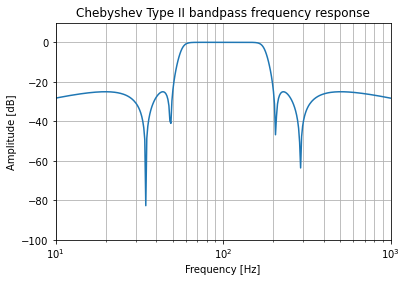

In [55]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

data = 356.09,349.18,355.1,348.28,350.14,347.14,353.96,357.03,355.46,354.6,352.75,350.42,350.53,351.3,358.13,356.82,356.6,358.02,342.35,347.51,356,354.89,355.61,354.87,346.31,352.87,360.77,358.4,356.61,359.1,360.67,348.63,354.82,355.67,361.27,359.69,366.1,361.13,358.23,362.76,366.76,359.93,353.06,356.77,353.78,363.94,362.45,357.92,357.37,357.86,360.94,366.33,363.48,359.68,358.13,359.11,360.86,356.84,350.43,351.42,350.13,347.76,352.76,356,364.79,356.05,358.97,355.38,357.72,349.28,359.45,353.33,358.79,347.74,353.63,348.28,347.83,351.99,357.95,361.36,354.19,348.71,353.86,352.42,359.96,345.3,349.6,354.63,363.75,358.05,356.35,351.26,349.33,351.27,346.4,351.26,356.64,347.69,355.54,350.17,361.46,351.8,351.03,356.17,358.35,354.68,354.07,354.97,356.92,352.98,351.16,357.58,359.02,354.95,349.35,351.28,351.86,356.56,349.99,362.6,355.4,359.57,356.71,353.79,357.47,355.41,352.3,355.66,359.61,349.69,363.63,357.72,352.55,366.03,351.92,357.6,355.51,354.85,356.86,349.61,357.42,353.92,355.39,356.47,357.95,361.55,355.08,358.04,355.65,361.75,365.1,358.83,358.07,360.44,355.91,355.93,358.61,353.67,354.62,353.71,359.95,351.44,356.64,356.11,363.54,357.51,368.18,360.16,356.87,358.1,354.33,358.87,362.78,356.42,364.75,362.22,355.16,360.39,362.43,366.38,358.85,365.96,361.48,363.27,370.71,366.79,374.8,363.21,364.09,367.97,370.45,364.67,366.85,365.17,364.32,370,367.34,364.84,365.31,360.79,370.29,368.12,356.47,371.43,369.12,365,371.58,376.58,365.94,370.13,366.99,370.79,366.8,368.76,364.1,368.83,363.33,361.22,364.54,367.11,364.08,361.15,357.73,362.96,359.4,360.9,372.02,360.85,357.92,358.9,360.25,359.34,359.98,353.92,362.5,365.15,356.88,361.66,364.17,361.78,360.36,358.03,361.38,366.9,359.27,367.38,364.37,364.91,359.7,368.4,362,362.08,378.29,365.22,364.22,361.1,359.6,360.39,370.06,364.92,366.06,366.28,360.72,362.27,361.64,367.33,362.37,362.82,364.96,365.5,370.62,358.93,361.74,356.86,368.14,365.4,360.21,369.21,362.67,356.89,361.66,364.16,360.2,358.51,359.43,360.18,361.8,363.59,364.44,368.08,361.06,367.73,359.11,361.95,362.76,359.91,357.64,367.51,362.59,362.65,358.08,363.79,365.17,356.08,359.53,361.85,362.45,371.09,364.44,373.3,371.28,369.12,370.16,380.09,377.4,381.17,369.83,373.5,373.74,370.29,368.15,368.03,374.13,366.18,376.26,371.61,374.92,375.38,377.22,375.32,369.71,369.07,367.95,370.37,363.66,365.1,374.11,364.11,371.77,363.06,370.17,376.02,370.72,367.61,367.37,369.95,375.9,371.91,361.16,361.46,360.97,363.11,367.87,364.07,357.89,365.98,364.08,366.01,363.76,360.48,355.78,350.39,343.82,348.45,350.9,354.13,344.16,352.49,341.2,341.31,347.35,340.8,351.77,352.19,352.24,341.2,338.49,351.56,357.21,354.25,351.08,348.75,346.36,350.75,355.41,351.08,350.25,356.29,353.3,355.79,350.33,352,355.58,356.81,359.8,356.34,358.01,358.82,359.16,363.39,362.2,364.62,359.53,365.82,364.27,366.61,363.92,357.64,355.52,356.65,370.58,366.76,373.4,369.21,364.84,370.18,365.77,374.02,373.39,377.42,372.89,373,368.44,375.04,377.23,382.86,374.21,373.84,382.62,373.34,381.07,376.16,368.95,385.44,375.09,386.13,382.9,382.54,385.61,382.63,380.97,383.52,389.63,384.39,373.86,368.49,379.14,375.73,389.43,382.13,380.02,373.19,387.02,381.03,371.04,374.61,384.01,376.35,381.56,377.67,391.23,378.98,384.39,373.49,383.21,377.02,384.78,377.13,381.54,382.88,376.63,381.13,369.01,367.98,374.1,375.01,386.6,377.09,374.44,372.49,373.99,375.92,372.23,367.59,358.77,370.22,365.5,369.79,358.25,365.1,362.79,355.15,370.59,359.74,357.04,359.17,355.31,354.89,354.24,360.98,357.25,352.9,360.95,355.18,359,353.97,354.65,357.41,362.16,364.88,360.26,359.62,366.13,373.35,362.93,381.09,370.61,368.83,372.79,377.88,379.3,375.63,379.04,374.27,372.67,371.41,375.31,380.57,382.31,388.47,384.82,386.76,383.33,378.93,389.16,390.61,391.88,382.67,390.86,390.91,385.89,387.8,386.53,390.47,387.22,391.9,380.1,387.43,383.63,382.05,381.47,380.98,384.39,393.35,386.67,386.76,378.98,384,388.39,384.24,376.62,385.27,394.47,387.19,387.79,381.32,393.59,384.47,385.26,388.38,376.47,381.97,391.55,388.23,387.2,392.31,380.97,383.3,387.84,393.82,387.19,384.68,393.18,381.97,383.28,392.84,385.6,389.99,390.14,383.17,384.09,387.67,387.7,392.1,389.2,387.91,387.95,386.45,381.79,391.24,388.43,391.16,393.26,398.29,393.94,388.79,391.11,394.66,394.34,389.3,390.46,395.4,409.6,400.46,398.95,400.58,396.79,401.69,405.29,399.3,392.09,400.87,397.52,403.12,397.68,398.4,405.93,401.56,395.05,391.04,397.79,396.22,396.79,396.61,397.63,395,390.74,398.1,398.71,396.49,405.42,394.89,397.4,394.74,394.9,395.81,390.08,400.98,397.23,407.63,391.55,392.34,389.41,396.63,394.58,401.98,394.95,394.51,395.08,394.13,403.91,400.18,393.23,400.61,401.4,396.99,408.52,400.79,394.22,389.2,400.13,397.56,399.95,391.99,393.8,406.03,396.52,393.59,401.09,401.92,408.31,409.04,405.28,411.55,416.41,404.31,407.32,414.37,412.13,410.78,412.27,416.32,405.96,414.88,405.29,412.56,403.59,412.62,407.18,409.27,406.39,405.5,410.56,408.89,404.65,409.35,407.26,399.35,403.43,405.64,407.84,401.89,403.93,402.54,404.43,400.42,403.73,397.45,404.73,406.92,403.1,401.73,401.99,399.54,401.65,398.5,405.93,398.29,402.06,400.42,398.99,390.05,408.4,395.96,400.57,401.38,406.35,402.65,403.7,402.73,398.76,403.83,406.52,407.36,401.25,406.48,400.21,404.49,403.9,403.79,401.19,405.39,402.28,402.71,405.58,409.42,397.5,411.49,407.16,414.55,405.55,405.78,412.84,409.6,406.87,413.82,410.51,411.47,404.6,407.17,414.18,408.17,417.32,417.27,414.27,411.96,417.2,412.19,407.51,405.85,410.92,411.48,417.67,414.4,410.68,412.45,410.11,418.04,420.42,414.24,414.38,415.49,406.06,417.66,417.02,411.18,417.68,419.68,421.31,418.36,429.05,420.24,431.52,422.54,429.24,434.67,419.16,425.78,428.25,420.79,422.86,420.61,420.01,418.61,411.43,413.66,416.1,423.31,415.03,410.01,419.69,406.31,420.98,423.03,422.92,417.7,412.17,418.1,418.49,421.79,420.7,419.56,422.29,415.13,420.18,413.93,416.7,412.25,414.22,413.83,413.09,409.18,410.58,411.27,410.21,417.95,416.66,411.4,416.36,403.96,403.98,414.92,407.99,399.07,395.17,391.84,402.17,400.42,394.22,385.54,388.93,391.48,396.03,394.95,393.52,397.02,397.04,396.65,401.26,400.59,397.63,403.55,392.68,399.85,393.53,396.93,393.58,400.31,406.6,400.76,399.86,404.21,396.65,395.46,398.31,404.38,392.38,388.79,403.44,400.91,392.44,399.55,399.72,401.22,392.23,393.47,401.18,393.84,385.34,387.59,386.65,387.1,393.53,387.5,390.1,390.42,394.45,384.75,387.06,395.96,395.8,392.59,381.61,392.41,402.22,395.05,401.83,399.97,398.69,393.03,388.93,402.85,401.22,397.24,391.24,395.62,393.64,403.59,399.55,403.13,394.31,399.19,396.86,400.52,397.04,401.05,390.62,394.96,398.93,407.7,398.48,400.63,399.64,394.62,400.77,399.07,403.15,406.05,402.28,403.57,410.19,413.78,405.04,411.77,408.95,412.43,407.72,414.6,415.08,419.4,420.92,422.12,418.95,418.13,416.86,425.69,417.67,425.22,424.09,426.91,418.49,426.07,430.04,434.83,425.76,428.51,425.13,417.61,422.12,421.19,421.65,433.88,420.74,422.51,424.9,422.98,415.42,419.84,423.89,429.76,432.79,425.79,424.78,426.55,426.64,420.96,424.95,422.08,422.94,428.78,420.98,423.37,422.92,421.5,422.14,429.78,427.05,421.96,422.02,424.48,426.36,426.77,426.81,419.42,413.86,412.49,425.82,419.21,417.32,422.38,414.76,412.09,412.31,411.58,409.47,407.12,411.35,415.82,409.74,415.93,413.81,410.49,411.17,408.12,413.75,420,413.04,408.91,409.99,405.64,407.49,411.16,417.63,412.27,411.12,406.02,408.3,410.13,408.62,410.84,409.05,404.41,408.15,416.77,403.03,404.76,411.81,413.77,413.56,405.39,412.04,412.57,415.15,418.36,409.56,413.97,413.37,419.35,413.05,414.96,407.09,410.69,416.74,411.01,410.91,409.24,413.3,415.9,417.24,414.15,407.64,410.89,415.82,418.81,410.72,417.18,411.42,415.05,406.42,405.52,405.22,409.9,403.23,406.82,398.23,400.44,408.88,403.91,404.69,403.4,409.92,406.31,403.08,403.65,397.19,407.62,398.38,401.93,402.54,406.3,397.79,399.88,403.77,403.15,403.82,399.72,402.29,405.15,401.64,409.45,397.12,406.28,397.25,398.46,400.83,396.79,405.12,395.31,396.85,395.39,399.03,401.69,396.63,397.14,398.13,409.68,397.9,395.98,395.15,399.16,401.76,397.64,395.69,398.38,401.56,391.84,395.19,386.51,397.13,405.65,401.71,396.45,399.3,394.98,402.71,397.12,394.77,402.44,401.75,403,401.29,403.88,399.03,403.82,395.85,397.84,401.22,407.69,404.63,409.67,410.91,404.93,408.08,402.96,412.75,414.96,406.65,411.1,416.41,406.95,409.32,420.58,414.48,419.71,415.74,411.07,421.54,420.37,411.94,415.41,411.56,421.21,423.24,415.53,419.34,420.01,415.95,411.15,416.56,416.94,415.65,415.91,412.07,416.25,418.55,418.69,418.92,418.7,416.37,419.07,411.39,422.3,412.85,412.83,420.28,414.04,413.35,412.56,416.88,414.26,413.1,421.12,418.16,420.58,422.5,414.14,416.45,420.29,423.65,421.74,417.45,425.99,431.47,429.91,425.24,421.13,419.42,420.27,424.99,424.93,423.96,422.25,415.69,418.28,419.2,418.57,414.56,422.58,414.69,420.29,419.51,418.14,419.33,418.45,419.67,420.58,428.16,415.14,416.53,420.13,413.1,421.21,420.3,424.67,423.96,423.68,424.43,411.62,417.72,418.92,415.9,417.93,420.83,424.44,421.88,428.5,426.56,422.01,422.58,420.15,427.57,431.62,427.66,427.37,421.54,423.97,423.87,429.84,424.89,425.26,416.9,429.16,423.43,416.57,426.51,417.8,419.96,416.69,425.68,412.7,421.7,420.12,420.78,423.7,422.05,423.88,432.72,419.65,430.07,429.68,425.36,423.89,433.51,425.18,429.19,429.04,433.6,433.61,432.7,427.73,424.31,432.7,422.52,426.13,437.99,435.12,423.52,430.49,429.96,428.26,416.95,431.13
,433.76,429.19,429.6,436.27,437.96,432,427.93,433.8,426.65,435.08,435.16,431.18,437.3,428.2,425.63,431.81,428.12,444.88,432.93,430.77,439.92,432.8,430.41,429.62,430.15,435.28,439.09,437.69,438.81,435.13,432.87,435.14,435.21,430.51,435.77,433.25,436.78,433.25,429.66,428.66,435.66,430.16,435.81,435.48,434.91,428.65,436.52,439.39,430.3,440.89,436.52,432.57,432.1,443.48,442,435.39,441.29,439.2,439.33,437.51,440.29,440.72,435.41,433.27,431.36,432.18,437.75,440.34,431,437.77,432.24,429.66,428.99,423.98,426.95,429.22,426.68,425.66,426.93,427.95,431.71,429.77,433.66,431.88,428.77,434.6,430.58,420.85,431.98,426.34,429.78,424.97,426.1,429.99,420.64,434.4,434.99,428.05,428.36,420.88,425.3,422.2,419.64,434.78,424.65,419.96,428.69,425.42,428.25,424.36,420.01,420.33,426.48,432.06,422.37,425.88,426.1,425.06,425.83,424.91,428,429.68,423.36,418.85,420.14,416.67,415.84,413.19,419.39,413.86,412.53,420.76,424.57,422.8,418.58,414.95,416.06,419.57,418.11,417.47,419.72,419.79,418.46,415.33,419.75,409.38,410.76,419.34,418.27,416.91,427.5,420.27,422.92,417.26,418.31,413.1,419.57,415.74,410.1,410.87,414.77,408.96,418.13,415.87,423.71,425.21,415.95,424.56,416.46,421.12,421.02,426.85,416.93,423.66,423.94,430.15,417.09,424.76,429.9,424.89,419.36,425.44,421.17,425.2,421.62,421.54,425.61,420.66,422.92,423.33,425.07,423.27,427.34,422.73,423.24,421.81,424.13,423.27,422.04,422.4,424.79,424.17,423.37,422.73,423.23,422.67,427.44,421.28,420.26,425.66,421.06,422.33,417.1,418.25,419.81,413.26,410.8,422.09,416.75,417.42,422.74,420.17,420.74,421.33,418.14,412.99,412.04,413.36,411.05,404.58,413.1,411.61,415.46,413.29,419.12,415.18,422.15,415.44,420.4,412.65,405.52,410.01,403.73,406.67,408.71,410.31,405.04,407.62,413.84,409.03,408.06,412.78,410.45,406.7,411.14,404.32,405.48,408.52,412.35,411.72,403.51,402.3,394.43,404.28,401.38,404.45,393.53,408.55,401.28,410.07,402.88,404.52,397.3,405.4,405.9,402.74,411.73,405.38,401.45,400.61,396.97,401.35,407.12,414.21,396.48,408.19,397.63,398.57,404.77,399.55,402.64,410.36,404.43,407.27,402.79,408.89,402.14,404.8,395.5,401.14,400.91,399.31,399.37,399.51,408.35,411.6,410.36,405.21,404.25,403.94,409.13,412.7,403.34,407.57,408.25,404.58,408.92,413.58,409.42,402.79,415.27,412.92,414.68,411.54,413.05,413.7,408.57,407.96,407.37,415.52,411.01,410.9,411.48,407.04,416.32,412.64,416.83,410.98,413.39,413.16,413.9,410.14,417.63,415.76,412.02,397.92,407.11,407.76,410.66,407.69,411.57,413.65,408.05,409.7,407.6,412.56,403.85,411.46,407.64,415.45,414.6,413.76,405.57,409.02,409.26,412.04,404.36,413.55,407.17,401.71,405.2,404.09,413.28,409,411.55,407.9,404.3,407.92,411.18,410.63,406.04,411.91,410.14,413.36,406.66,409.06,413.61,410.16,415.19,420.26,416.15,408.71,413.5,414.42,421.22,416.36,417.73,416.57,417.71,419.85,413.53,418.38,418.11,410.3,420.18,422.91,418.39,416.13,415.28,418.61,417.32,420.38,415.55,414.12,415.15,414.95,418.86,409.54,416.62,416.8,418.96,411.53,413.4,416.18,411.11,414.92,416.78,419.27,423.25,422.13,422.41,420.57,425.13,418.12,417.2,422.44,420.17,416.45,424.38,423.04,418.78,416.69,421.62,418.54,417.57,419.97,428.07,417.77,420.92,418.99,418.84,425.32,418.51,417.53,425.56,421.87,411.89,420.66,416.25,417.51,423.72,418.78,422.12,414.23,411.27,415.28,410.5,421.74,412.2,414.67,410.72,418.44,406.58,415.08,408.58,416.15,408.35,410.65,403.09,412.67,411.77,408.72,406.14,418.18,409.46,415.05,417.02,410.62,409.87,409.06,407.47,403.31,404.51,413.3,411.94,411.73,405.2,408.79,408.01,404.1,406.85,412.07,412.56,406.08,406.66,411.41,407,413.94,412.69,404.98,409.85,421.66,412.46,411.72,412.38,417.69,420.27,407.35,417.11,413.76,412.97,412.57,414.71,426.2,413.43,416.87,420.21,421.19,424.17,424.78,429.81,426.96,430.87,429.59,426.28,435.73,426.73,428.25,431.08,425.29,430.4,437.57,434.94,433.94,431.2,433.78,429.82,437.89,430.05,436.31,434.18,430.5,433.04,438,435.48,428.94,438.28,433.26,428.47,434.06,431.67,428.05,426.95,422.76,431.8,423.15,423.05,434.85,418.39,433.37,430.82,423.72,433.42,421.65,435.98,426.34,422.4,424.44,425.8,429.5,426.19,422.1,430.14,424.76,429.95,427.62,425.29,433.74,423.96,431.15,430.17,426.19,427.46,427.1,430.57,426.36,436.06,432.69,433.26,429.37,416.19,409.27,427.07,430.52,432.81,433.39,432.71,439.12,432.73,433.96,425.04,434.56,422.47,426.21,437.78,435.9,435.43,438.73,428.57,435.03,441.25,438.02,442.62,436.96,433.5,441.76,434.5,435.22,440.93,439,438.38,439.57,434.38,443.51,439.01,432.28,429.16,426.12,425.46,430.61,438.11,431.05,425.75,428.5,425.85,424.87,419.58,427.99,431.1,433.88,428.95,427.76,417.86,424.38,423.34,429.44,423.52,422.97,421.12,425.59,433.67,419.51,422.62,421.13,427.53,425.29,421.51,425.71,424.27,418.04,431.81,416.76,425.22,421.54,423.38,427.94,427.08,433.66,417.95,424.14,422,417.23,424.71,428.21,430.16,435.97,430.45,426.98,433.89,433.14,430.59,429.01,435.27,434.13,429.27,423.3,426.65,425.17,423.24,428.49,426.82,424.82,429.67,423.23,422.38,429.32,423.7,422.76,422.74,420.58,416.97,414.32,411.62,413.57,414.22,411.19,412.12,413.93,416.14,410.05,415.95,408.87,417.6,412.11,410.64,412.35,410.1,406.32,414.13,410.86,417.29,412.51,413.52,406.56,407.61,408.81,412.76,417.76,411.56,408.85,413.47,416.71,409.64,416.15,419.07,417.02,413.05,412.28,418.04,412.65,428.75,419.12,415.44,411.7,422.79,429.93,424.06,407.27,419.94,413.81,417.09,419.26,418.84,409.51,412.95,411.85,412.99,409.76,415.18,418.52,414.59,414.88,418.75,416.02,408.66,413.78,414.34,418.54,410.19,422.29,416.08,405.72,412.32,416.4,418.25,412.86,402.85,411.28,417.04,425.96,416.21,408.79,412.08,412.76,416.5,415.08,412.84,405.77,409.81,404.85,413.73,416.91,414.32,410.62,414.22,401.73,402.81,401.1,396.53,406.14,408.6,416.73,407.64,397.7,396.86,402.91,398.02,400.73,402.16,390.28,394.9,399.14,390.81,393.04,395.96,396.48,393.34,391.33,392.01,388.59,382.45,385.54,379.63,383.4,385.87,383.73,395.81,386.97,383.41,383.11,383.49,388.22,389.6,389.39,392.37,380.61,383.48,386.68,391.25,396.73,381.81,383.71,386.39,389.08,385.16,386.76,398.32,391.13,387.53,385.89,390.07,387.37,393.62,392.12,395.85,387.6,390.45,391,395.34,391.52,388.49,392.18,385.51,392.58,397.81,394.75,390.68,387.92,393.03,395.55,393.34,398.12,394.36,391.42,399.43,388.75,381.38,398.04,398.44,399.55,391.64,394.61,398.66,403.16,401.32,398.62,401.98,401.79,391.74,402.39,404.36,393.05,398.89,399.47,401.28,397.84,402.16,396.41,400.18,400.46,405.62,397.63,400.49,394.96,399.18,394.93,392.59,400.3,395.01,396.91,396.05,391.73,402.56,398.53,396.31,392.95,387.13,396.5,398.86,395.73,396.63,386.42,386.11,393.91,394.59,400.79,395.65,401.81,401.23,399.33,400.21,398.8,403.01,397.76,402.44,392.84,394.72,406.04,409.55,402.65,398.65,402.8,397.09,405.13,409.47,401.91,395.62,408.17,397.45,397.08,396.59,398.7,406.29,392.21,395.95,397.05,399,396.9,393.06,393.35,390.61,402.99,389.58,392.83,392.91,395.48,393.11,397.24,388.82,397.06,382.42,384.41,385.04,391.32,388.91,388.79,390.06,386.8,380.49,387.62,376.61,385.53,389.24,383.67,391.6,384.53,391.88,387.3,386.07,391.32,388.78,390.78,385.05,387.48,388.35,385.65,378.26,390.4,378.86,378.23,383.29,387.87,381.88,376.58,385.19,382.45,376.31,386,384.63,374.53,381.12,372.23,372.82,380.22,371.29,379.01,373.32,376.44,380.06,374.74,375.37,375.61,379.9,370.67,366.2,371.89,375.09,368.6,378.16,377.51,377.09,378.94,386.83,384.45,380.13,382.83,379.05,380.62,377.5,382.3,382.55,383.7,380.68,385.4,385.18,383.51,381.45,378.83,384.43,386.44,380.87,371.45,378.48,375,385.13,382.67,385.73,393.36,384.61,387.67,386.42,384.69,388.88,386.27,386.76,388.28,386.36,383.39,382.18,384.92,379.89,381.12,378.6,382.32,383.22,377.94,382.71,386.76,378.88,385.9,388.51,391.68,396,383.5,389.69,389.19,389.23,389.86,394.94,382.43,388.35,388.31,392.49,398.46,397.76,388.02,389.9,387.77,388.85,392.53,388.64,387.97,391.09,390.7,388.22,393.46,403.51,401.57,391.01,401.05,395.51,396.47,392.97,404.59,400.23,393.73,396.12,402.86,399.56,407.02,401.93,402.91,402.04,397.32,401.27,403.37,393.4,401.4,397.93,405.67,389.81,399.87,404.61,392.23,400.3,396.51,404.28,395.15,402.53,391.41,401.76,397.11,399.41,403.16,392.59,397.18,390.42,405.66,397.95,392.97,402.38,392.76,398.63,397.8,402.41,394.37,397.05,394.19,400.99,393.35,394.01,398.79,399.41,391.86,403.5,404.26,396.59,400.84,389.48,393.53,392.99,400.29,393.33,396.69,402.04,401.23,399.3,389.94,397.19,399.12,391.49,396.48,392.01,399.91,394.86,390.34,389.97,395.69,397.26,390.6,394.62,386.6,400.13,390.11,391.71,397.52,390.38,391.52,385.21,393.4,378.93,391.06,383.53,382.24,390.06,384.66,376.5,387.31,379.88,384.99,382.19,383.27,380.71,385.71,380.98,387.16,380.28,377.48,389.82,387.52,376.34,380.33,391.68,378.89,381.55,378.25,376.55,381.11,378.92,377.06,376.02,384.35,375.23,377.09,381.12,376.31,366.92,367.68,378.82,377.27,380.28,379.92,372.8,369.97,378.02,366.29,376.67,376.48,373.51,375.87,373.76,376.07,372.93,379.78,376.89,372.71,371.2,380.68,368.57,368.98,372.3,378.1,369.68,375.35,378.54,376.68,367.54,373.34,381.18,375.4,375.23,372.82,373.2,372.85,369.74,370.72,370.42,370.17,365.76,373.49,369.96,370.61,367.79,366.6,365.37,366.23,367.14,373.83,372.57,384.44,378.63,378.27,376.71,374.44,366.64,381.86,383.71,373.32,370.21,370,374.3,368.55,383.38,379.9,380.36,386.85,382.12,376.57,381.73,376.25,376.69,375.74,375.5,373.18,375.92,378.03,381.35,385.93,384.58,378.29,380.03,380.22,383.35,376.87,379.04,379.38,378.06,376.87,377.31,
385.64,389.94,379.51,387.84,379.71,384.21,371.73,378.28,381.39,374.71,381.08,382.99,377.36,379.24,379.79,380.29,373.56,383.42,379.36,370.61,369.21,376.31,368.36,370.85,363.6,369.73,364.23,368.01,361.34,365.31,366.19,368.45,371.49,369,372.67,360.8,365.25,361,367.5,371.29,377.3,364.12,371.02,369.85,362.39,368.25,371.17,370.78,367.91,375.48,376.92,373.27,372.23,372.22,369.43,359.42,368.38,368.12,364.66,369.78,361.92,360.91,365.68,363.81,361.68,366.01,362.97,363.12,354.92,358.56,358.14,357.18,361.3,358.51,368.29,361.31,362.72,359.61,365.81,369.04,361.96,357.7,356.66,358.78,355.09,356.05,361.98,358.75,361.42,348.18,348.95,351.04,349.61,356.48,357.02,342.28,352.39,355.44,354.61,350.98,349.34,341.15,353.27,350.8,357.7,350,355.93,348.99,352.98,353.2,347.58,351.48,344.67,343.19,346.29,349.01,350.37,348.67,350.7,353.04,355.88,352.88,359.14,360.93,356.22,362.34,356.36,358.16,360.7,362.73,363.22,369.71,358.09,352.1,362.13,355.27,354.25,356.78,363.75,359.25,362.83,354.38,355.18,363.73,364.77,361.11,362.76,360.21,367.17,363.67,356.1,367.87,354.56,352.41,356.6,357.24,362.65,371.18,363.63,361.01,361.56,354.23,363.27,359.88,361.37,364.2,361.32,354.97,355.68,361.62,360.24,357.25,355.09,353.73,356.5,361.73,351.85,351.08,356.46,346.54,349.62,343.7,342.93,348.6,349.3,349.7,351.54,354.95,352.25,348.66,349.62,349.84,354.75,353.21,348.19,354.88,336.46,348.81,349.94,347,347.97,350.63,351.72,347.56,342.37,345.81,354.45,339.06,341.33,349.57,350.41,363.33,358.48,350.72,350.08,357.08,346.41,353.44,345.92,354.15,343.46,352.85,356.85,349.52,343.41,343.18,351.67,346.37,344.58,349.99,344.81,356.22,353.74,348.61,341.72,350.53,339.49,347.42,346.92,348.83,345.5,347.7,352.82,347.7,347.03,351.88,358.7,346.79,339.14,338.57,333.56,336.31,340.92,341.92,333.43,341.44,350.08,342.6,337.88,332.77,332.23,340.32,341.41,344.74,344.85,341.84,336.54,337.13,337.65,337.75,350.32,341.36,338.78,346.67,343.56,344.08,342.75,354.24,359.18,343.95,340.22,346.97,337.66,339.55,335.22,341.07,340.5,342.14,341.89,343.45,337.46,328.63,335.61,332.72,331.58,320.98,319.56,319.58,329.58,311.14,320.47,321.66,326.03,322.95,320.43,319.53,322.44,323.61,323.54,319.14,326.65,323.58,330.81,323.14,327.55,313.27,327.68,328.77,322.59,321.53,321.34,325.42,324.44,333.05,326.11,320.74,331.22,319.18,324.08,316.35,319.43,322.38,312.09,322.12,322.79,320.66,324.07,321.83,327.16,327,322.71,321.18,320.52,319.26,325.65,322.72,318.03,326.51,318.4,321.66,318.77,322.24,326.28,326.55,321.66,321.18,317.6,319.06,324.43,317.92,314.71,321.05,316.19,316.61,325.65,317.42,324.73,319.79,329.92,319.92,326.16,319.25,327.09,329.8,327.15,322.21,316.66,311.77,315.25,325.04,325.91,319.27,312.9,315.66,321.4,317.23,318.57,317.96,316.15,320.71,320.8,328.95,327.82,321.23,323.21,324.49,325.21,321.67,326.09,325.62,333.85,332.38,330.09,328.62,324.97,319.88,321.95,327.12,324.1,329.87,321.37,321.8,324.9,324.79,330.01,319.82,316.85,312.28,314.87,309.3,311.3,318.57,320.14,326.22,319.6,324.7,324.89,328.93,324.11,322.96,328.7,330.9,327.5,320.88,323.54,326.3,323.94,332.32,331.72,324.97,342.63,327.21,339.36,326.74,328.24,328.02,336.62,331.7,335.61,335.59,332.46,335.91,331.51,330.95,329.19,339.47,342.8,335.08,339.18,339.45,340.08,329.26,333.4,328.54,331.77,336.3,329.65,331.89,326.4,314.1,318.59,323.27,324.29,329.42,323.43,330.3,319.24,320.21,323.96,319.77,320.74,320.52,320.26,316.71,321,324.72,326.73,317.11,325.9,324.8,317.1,320.15,324.16,323.33,331.72,326.75,326.21,323.63,322.86,335.38,323.9,329.45,325.39,329.62,326.31,331.23,328.5,329.34,336.13,329.63,328.27,328.49,335.67,326.16,330.17,328.17,331.37,328.72,336.75,334.96,341.15,336.19,337.97,337.53,337.42,331.02,339.74,339.82,340.81,335.93,340.15,325.68,327.85,337.34,338.04,333.74,332.16,333.65,339.29,340.93,337.97,335.86,340.74,341.76,339.22,341.82,333.35,339.21,334.69,343.19,346.6,338.62,340.19,342.37,340.19,340.83,345.29,333.79,342.22,337.04,343.55,343.53,341.71,341.57,348.74,346.96,348.65,344.34,341.31,340.61,347.39,350.49,345.99,340.62,340.34,344.47,346.82,340.02,343.06,348.06,339.67,352.06,350.31,354.46,352.6,345.5,347.47,352.07,346.55,343.92,345.27,345.91,345.06,353.58,352.79,350.56,347.48,350.03,355.97,348.74,357.98,356.71,349.25,348.91,352.15,357.37,347.67,351.77,345.27,355.52,356.43,350.85,348.57,357.17,350.5,351.81,350.98,357.06,353.81,350.89,351.22,348.79,353.42,355.48,353.82,353.78,354.23,349.75,357.24,352.56,354.52,354.15,348.7,343.42,348.84,349.8,344.68,360.45,354.32,351.83,361.18,350.08,347.94,351.78,348.22,349.61,345.19,350.33,343.71,352.25,349.73,352.21,353.32,352.89,356.15,357.45,347.53,341.49,344.35,346.09,347.84,349.65,342.74,344.34,344.11,343.65,342.73,344.63,338.52,343.45,343.68,343.13,339.4,333.83,338.58,335.26,347.62,343.5,339.29,331.35,337.5,348.37,345.16,346.62,341.47,346.6,343.98,342.44,338.39,338.1,344.54,337.26,339.08,340.45,340.53,347.81,356.42,347.21,336.04,340.73,343.83,344.31,341.85,335.41,348.02,342.96,345.35,347.58,343.38,342.54,348.99,345.88,340.77,340.95,343.49,343.63,346.94,345.78,354.33,349.27,354.67,348.53,349.18,345.36,345.14,343.97,348.45,353.15,346.18,345.87,347.71,340.51,344.39,345.28,347.43,345.7,348.67,349.86,345.92,341.82,349.87,351.22,353.01,349.73,347.37,358.7,343.73,348.12,349.87,358.66,347.06,354.82,353.06,347.15,345.16,347.43,346.97,352.3,350.36,358.27,355.69,350.02,343.21,353.95,339.74,345.16,353.45,355.3,341.26,342.8,354.27,345.42,350.79,348.07,353.16,347,343.44,344.69,345.54,350.94,359.76,353.15,354.15,350.52,351.17,347.51,348.98,350.09,355.92,363.53,352.12,358.1,365.08,356.95,364.99,363.98,358.77,357.22,350.43,359.27,354.96,355.84,355.49,357.02,352.93,356.89,355.33,357.54,352.17,356.33,360.92,356.94,357.65,361.29,365.21,357.74,360.3,355.88,362.98,352.4,355.1,358.16,361.39,365.21,357.5,362.24,358.81,361.02,358.99,361.3,364.08,359.83,362.08,360.01,359.9,353.44,359.39,361.31,361.97,363.43,367.32,365.21,362.09,362.75,365.92,359.77,357.65,358.23,355.93,362.2,354.47,358.27,365.8,371.9,359.8,360.49,358.97,358.4,357.5,359.99,357.04,353.67,365.83,358.95,354.08,360.33,362.27,364.01,363.36,360.3,361.34,352.71,358.04,353.56,356.44,355.67,360.55,357.08,359.96,371.94,358.14,359.85,363.73,369.73,363.47,365.84,351.82,352.62,351.76,360.33,359.01,360.53,358.54,356.94,350.29,356.75,352.35,353.25,358.75,342.38,349.71,347.47,349.57,352.31,348.6,349.33,347.54,359.65,355,358.43,348.45,353.77,352.66,355.82,355.42,350.75,353.14,363.84,352.49,362.83,354.42,354.59,363.95,359.33,352.38,352.7,357.44,364.29,349.61,352.91,356.01,349.05,353.89,350.64,351.49,358.68,356.79,357.21,361.67,353.74,350.77,358.42,359.15,355.62,356.74,350.62,356.37,359.24,357.76,356.69,356.64,353.21,354.64,361.03,355.67,353.89,352.48,354.59,360.17,346.39,354.61,352.17,353.62,350.73,346.3,354.72,346.18,350.06,344.77,348.59,347.74,347.62,343.2,355.22,348.58,342.57,346.66,352.11,343.85,345.73,346.65,342.92,342.43,345.94,346.14,343.27,342.15,333.37,345.4,346.12,343.57,347.7,357.81,346.85,356.1,349.53,350.95,350.07,347.25,345.99,354.16,355.74,355.29,354.06,344.8,354.36,352.02,353.76,355.49,360.27,356.24,343.82,352.68,352.91,355.24,354.5,353.28,353.59,355.39,355.86,354.01,362,352.23,358.49,357.21,360.55,354.65,357.41,353.34,360.74,364.91,368.87,363.91,358.89,360.37,350.67,359.06,360.24,363.38,364.09,376.94,371.12,360.06,361.75,370.23,360.64,362.62,361.37,362.2,366.27,372.12,360.03,362.25,369.79,364.77,365.97,370.28,364.83,365.4,363.43,365.86,369.24,367.15,368.95,366.82,367.48,367.76,363.81,373.4,367.52,370.76,365.01,366.2,370.66,363.92,364.64,369.73,371.09,373,369.09,374.53,366.66,366.52,364.88,371.03,374.49,368.85,366.36,362.91,361.07,361.49,355.81,357.11,360.33,366.3,357.2,366.94,360.52,359.53,358.28,373.51,365.64,364.74,369.21,357.65,371.18,365.15,365.64,359.31,362.59,356.91,355.8,362.56,363.89,367.23,360.67,364.98,364.28,347.68,355.28,358.77,364.78,362.91,361.28,350.83,360.44,359.86,362.4,356.69,356.93,356.19,360,351.17,358.17,361.8,368.28,365.55,362.74,367.56,361.66,349.98,359.74,359.22,359.28,357.73,356.47,357.05,362.79,355.91,358.85,363.44,353.94,361.19,363.5,355.46,359.08,363.29,356.68,359.17,355.31,353.54,350.53,357.15,360.68,355.91,355.8,357.69,358.62,361.62,355.82,367.25,359.8,356.31,363.53,364.54,364.57,361.67,362.76,362.22,365.02,364.43,364.03,365.41,362.91,368.52,364.64,360.71,365.35,369.35,367.79,372.52,362.29,358.74,362.05,363.79,358.11,362.74,368.14,365.94,358.74,368.31,371.41,366.22,363.41,359.55,360.27,366.54,360.13,360.58,361.76,369.26,364.55,365.42,368.64,363.5,365.97,357.14,364.29,359.28,359.3,359.38,356.8,363.97,358.86,362.43,361.97,359.56,367.98,359.53,362.86,364.59,366.56,365.87,360.42,361.82,366.1,359.2,358.34,366.52,359.38,350.58,358.4,356.82,356.93,356.44,363.36,352.2,360.21,358.85,358.52,357.2,359.26,362.65,362.95,367.86,361.91,362.4,358.88,358.83,358.53,365.12,364.15,368.98,369.87,360.55,370.52,363.03,365.77,364.61,370.06,362.19,367.12,367.16,365.39,366.66,364.19,372.1,366.53,367.45,368.82,375.59,366.58,363.58,364.86,368.23,364.58,354,364.22,359.84,370.5,366.83,374.31,365.33,364.81,357.8,363.94,373.91,364.74,356.04,354.39,355.65,360.42,360.4,358.78,358.03,356,353.4,360.95,364.62,358.91,367.14,361.86,367.64,366.16,364.14,360.4,361.91,362.34,368.71,360.68,359.91,356.91,358.24,367.15,363.06,364.91,358.99,368.49,367.88,368.6,365.31,366.34,361.15,362.43,368.31,368.12,371.31,370.52,373.6,368.99,381.85,365.36,363.34,360.2,362.41,369.68,371.49,361.83,373.12,365.73,364.15,368.92,362.85,372.38,375.72,367.72,366.35,374.8,370.24,368,365.33,375.73,361.4,369.68,364.07,363.77,370.83,374.9,367.73,368.24,367.89,372.15,359.66,368.05,377.93,369.67,368.18,373.22,371.65,365.54,369.79,367.82,364.68,359.03,368.62,358.99,372,364.57,363.75,362.49,356.69,355.95,348.81,347.65,350.12,360.02,357.9,363.58,362.61,363.41,361.05,365.15,365.02,374.08,369.03,365.3,362.07,
373.37,360.56,373.87,374.79,362.75,366.31,364.86,369.48,366.38,369.36,362.22,363.3,364.23,362.91,368.08,360.44,354.76,363.1,357.45,355.28,357.48,358.71,361.37,365.58,363.46,365.49,365.06,363.11,362.49,361.2,354.77,362.01,366.16,365.55,365.54,368.74,368.84,365.39,368.53,367.16,371.39,367.54,361.36,373.77,370.26,360.88,375.8,368.95,369.35,362.12,360,372.02,369.23,365.01,360.78,370.63,362.9,366.63,372.34,367.25,364.1,366.62,367.4,364.66,367.85,366.37,370.31,375.12,367.92,355.98,368.76,360.58,368.58,365.09,368.72,368.58,368.16,372.92,373.38,374.37,371.31,372.57,372.24,374.35,372.03,370.55,366.09,375.95,369.3,373.24,370.68,364.3,375.82,377.68,373.04,377.37,374.57,370.69,371.65,364.01,368.58,364.02,383.31,365.35,372.5,366.6,369.09,369.53,365.48,375.5,371.27,363.42,367.54,375.69,370.54,367.49,364.33,368.19,365.92,360.05,361.33,367.99,361.79,370.16,365.91,370.89,372.39,361.11,358.85,361.09,361.94,362.08,360.12,359.82,361.39,362.32,358.55,361.19,363.76,361.66,360.28,363.99,369.32,367.8,366.86,372.13,368.28,372.18,369.07,370.05,371.13,376.89,372.9,373.44,369.83,372.27,366.17,371.36,372.97,379.27,366.3,372.11,370.91,370.66,373.65,377.59,381.98,373.22,372.08,372.09,384.52,373.95,371.69,376.43,373.78,375.71,372.9,376.1,373.48,371.82,373.32,372.15,373.28,373.34,364.14,365.01,368.4,366.24,370.54,369.83,370.77,382.19,375.78,375.13,373.77,376.29,374.53,376.62,374.2,375.46,382.82,381.46,373.86,367.77,371.81,369.9,373.77,366.78,369.7,370.58,376.72,371.02,371.91,372.88,370.51,356.43,365.46,368.36,370,371.85,370.79,361.28,361.03,362.36,371.69,366.75,367.19,364.63,367.57,362.25,369.26,367.74,366.51,368.92,374.29,376.75,364.1,369.84,364.78,371.58,371.04,361.21,360.53,361.37,362.19,362.48,363.58,361.06,360.82,360.26,362.05,361.28,358.99,356.74,351.01,347.64,356.91,352.87,361.27,355.46,357.69,358.42,356.71,358.96,363.34,361.11,360.8,352.12,358.8,353.47,358.43,351.52,360.78,352.99,354.85,354.68,360.39,355.08,350.87,358.51,365.14,359.56,355.21,357.5,356.53,359.12,357.49,359.22,363.12,357.06,357.04,355.5,358.2,357.64,361.27,353.21,356.4,352.41,363.69,359.47,364.44,363.5,350.99,349.24,351.59,355.53,353.37,353.29,363.33,349.45,357.34,347.84,349.78,354.71,344.38,356.99,354.57,350.69,345.44,347.93,357.67,356.45,350.13,353.55,347.9,354.57,354.85,355.87,353.87,353.4,348.97,362.09,352.05,353.86,357.43,359.64,351.45,355.58,360.91,360.7,356.85,363.41,355.01,357.65,357.27,357.3,356.47,356.87,358.17,357.67,357.1,356.36,364,352.46,357.8,359.72,358.73,359.41,358.97,363.86,356.38,365.86,362.89,357.8,361.19,362.62,360.15,359.36,357.86,361.68,365.52,367.19,355.02,358.57,367.28,353.35,364.24,360.17,365.87,357.48,363.77,357.67,358.92,361.1,357.44,359.85,355.59,346.56,355.09,350.78,359.74,345.86,353.63,356.59,349.15,348.06,352.82,348.85,351.92,358.12,352.6,348.88,350.03,356.83,349.71,360.28,351.87,354.02,352.61,349.21,348.6,354.1,350.92,357.75,350.54,354.96,350.64,344.61,351.11,351.12,346.29,346.95,352.34,348.67,344.68,349.86,350.05,352.15,360.52,348.91,349.53,354.11,354.48,342.62,341.72,340.67,338.71,342.22,339.15,344.3,344.39,339.47,342.96,338.93,336.8,352.23,341.13,340.67,345.99,339.67,342.26,341.67,340.78,346.61,350.39,341.66,348.36,344.35,347.24,347.41,346.99,343.55,345.37,350.46,342.88,354.16,347.52,348.95,355,351.11,353.35,354.55,354.18,357.19,354.64,356.04,352.28,355.47,352.17,356.36,354.85,351.42,347.15,354.15,360.63,354.78,351.84,352.72,349.1,352.08,350.01,355.08,353.19,356.61,353.28,352.83,356.84,357.45,351.75,356.2,357.75,357.94,356.8,358.79,356.56,353.15,359.1,361.83,354.7,357.41,352.84,355.94,364.25,362.1,352.21,350.82,350.64,356.8,355.9,354.4,350.63,359.65,358.56,352.09,347.69,352.01,357.98,355.77,354.75,352.69,351.85,361,358.87,354.95,352.88,357.57,354.81,355.01,358.7,353.56,354.81,356.06,356.98,349.3,358.56,356.38,361,360.83,355.95,367.25,362.86,348.62,344.86,351.01,360.17,365.44,362.23,358.27,367.1,353.97,362.96,356.63,367.24,366.33,360.83,363.27,354.29,362.43,365.24,359.77,373.83,368.31,362.08,360.65,362.01,371.78,364.6,363.56,367.99,361.08,363.75,361.38,367.85,356.82,363.58,363.22,369.24,364.68,368.01,366.01,366.38,358.41,367.88,364.54,370.52,358.84,366.28,363.15,366.05,370.45,368.45,365.64,364.97,363.39,366.26,365.04,370.26,360.43,366.38,367.93,359.96,361.94,357.03,354.07,356,362.23,357.72,359,364.23,364.65,360.9,362.87,357.46,365.35,360.4,359.44,362.9,355.92,356.21,365.57,364.2,363.4,363.27,368.62,362.7,355.81,365.01,361.78,361.66,360,350.1,366.1,360.14,354.68,360.79,363.27,362.06,359.89,352.48,363.56,363.8,356.19,363.2,359.76,363.46,359.65,353.8,363.76,357.44,356.17,358.82,363.62,360.74,363.75,354.88,357.63,354.68,354.59,362.11,355.89,354.68,354.07,363.2,352.38,351.94,356.76,355.22,356.96,356.48,352.61,352.49,351.52,352.87,349.4,360.58,356.25,351.94,345.78,347.19,359.43,352.65,352.14,349.81,355.06,354.15,345.77,344.93,354.61,352.52,352.6,359.87,356.66,354.9,361.19,351.13,352.68,349.83,356.1,354.15,355.52,358.93,352.95,355.48,344.99,354.13,350.65,355.75,343.75,344.05,350.83,349.76,354.43,354.07,346.68,359.18,355.87,363.76,351.77,361.22,357,359.32,367.55,363.42,365.93,366.8,363.54,365.23,358.63,362.37,358.19,365.61,362.12,362.66,361.7,362.79,358.55,362.65,364.6,361.25,360.69,356.51,369.76,363.66,357.74,359.61,358.29,360.87,350.3,359.16,353.79,356.27,353.29,356.61,346.59,353.67,352.17,347.85,355.4,358.21,350.56,353.43,352.33,345.91,364.42,353.9,347.89,357.57,355.56,359.73,356.86,354.58,364.19,356.18,354.7,359.65,362.95,360.67,358.06,353.83,359,360.77,362.53,360.46,356.73,355.54,352,358.79,355.51,358.05,354.25,358.03,355.18,361.91,353.97,361.63,358.45,352.47,354.45,352.58,353.19,359.88,350.08,362.95,352.52,356.64,347.01,352.77,355.96,353.39,354.88,363.89,349.32,350.93,357.91,352.49,352.14,351.89,357.29,357.92,360.45,353.08,355.47,348.91,339.5,344.54,340.36,339.62,338.94,347.56,336.1,346.55,348.19,345.65,348.02,352.54,346.58,356.92,342.82,344.48,346.58,344.44,342.43,343.42,342.53,339.63,351.54,345.03,342.3,346.32,343.2,339.27,339.23,342.44,340.34,344.23,346.68,344.43,329.55,343,340.7,341.7,343.45,354.71,345.65,347.48,356.14,340.01,357.44,341.59,347.51,349.95,351.45,346.76,340.52,345.55,355.15,356.22,357.54,351.53,356.68,351.14,352.05,363.56,360.29,354.24,359.1,348.19,353.89,359.26,355.87,358.36,347.67,351.21,354.49,354.89,348.89,353.02,355.26,352.46,350.95,355.58,354.37,348.07,351.93,349.21,353.06,357.33,357.96,359.81,353.57,357.09,355.71,354.65,357.3,368.47,357.57,352.09,359.27,346.94,357.45,352.77,355.61,357.94,357.26,354.48,353.73,353.92,351.42,358.57,350.96,349.2,359.77,353.07,350.95,357.49,354.67,346.02,341.01,344.57,343.24,352.95,347.17,342.7,343.02,342.95,341.68,353.47,345.38,349.06,344.6,339.47,340.03,341.09,349.44,342.73,344.34,342.39,353.41,356.45,344.33,349.41,350.25,350.84,349.68,356.75,349.35,352.92,354.96,354.28,358.95,346.5,345.51,345.18,344.49,353.47,344.83,345.7,342.87,348.54,348.55,350.69,353.45,349.2,341.41,339.05,344.47,346.17,342.92,336.61,346.34,349.61,347.97,340.97,344.19,342.37,347.71,354.08,349.26,350.78,353.74,357.02,363.94,356.36,359.21,358.75,354.41,351,345.21,354.39,354.66,355.46,355.14,354.99,355.85,352.56,364.39,364.54,359.48,359.03,356.59,359.91,358.21,353.94,360.23,368.55,358.38,357.71,355.56,355.08,363.16,359.24,366.2,365.55,360.34,359.9,362.65,360,364.1,356.95,360.41,349.48,361.15,353.96,354.08,360.6,357.56,357.97,365.03,359.46,358.72,357.35,362.99,360.43,362.8,360.57,360.18,365.65,360.01,359.01,362.08,355.63,353.57,363.81,368.69,361.7,364.03,365.51,365.94,365.75,361.39,360.22,364.35,364.33,359,353.37,370.07,361.25,359.52,363.28,362.14,358.52,353.96,355.22,355.63,356.47,360.32,360.05,364.72,359.67,359.02,363.59,356.91,365.61,354.4,352.71,344.32,355.01,356.15,356.35,356.67,354.23,361.49,350.97,349.26,355.48,349.64,352.35,359.13,357.51,351.16,357.93,348.82,365.17,360.09,355.7,347.45,354.74,356.61,354.96,352.4,344.98,348.75,354.54,351.12,351.88,363.46,354.15,348.19,353.96,356.44,359.8,357.7,356.67,363.75,358.76,358.46,353.85,364.47,363.55,357.99,356.26,357.29,350.55,354.65,363.11,362.42,359.84,363.54,362.03,356.33,361.32,358.17,365.82,365.43,365.95,363.91,363.37,356.21,358.1,351.66,376.75,368.44,362.3,345.69,357.62,363.7,368.26,373.48,367.51,368.5,367.93,360.6,363.85,369.02,369.55,364.07,371.41,376.36,370.43,359.98,363.16,368.33,364.58,365.54,362.71,362.59,365.08,370.83,366.04,362.05,364.93,374.41,366.67,368.83,369.14,362.58,372.81,372.33,369.64,368.08,366.99,366.98,372.73,368.09,372.93,365.7,370.82,366.51,364.8,366.77,371.64,370.69,370.57,373.24,363.35,372.59,369.65,369.84,363.76,371.94,372.84,363.56,371.66,365.76,368.24,365.2,369.52,371.01,365.57,376.88,367.98,368.71,375.21,369.31,367.99,366.14,365.31,369.71,370.47,364.91,369.81,368.83,372.15,371.7,368.22,365.88,375.28,357.04,363.99,355.5,359.99,364.18,370.5,361.51,363.87,363.65,368.81,363.36,372.28,365.98,371.01,366.02,364.2,360.05,374.47,365.57,371.88,366.97,368.46,367.28,363.53,365.23,363.05,368.16,365.31,354.57,357.82,358.41,355.53,352.78,352.33,354.81,347.25,358.08,356.17,352.97,353.57,351.64,353.34,354.91,355.12,356.24,351.99,348.21,351.43,347.99,348.45,346.42,347.44,350.04,345.7,347.52,340.35,345.13,350.32,343.74,339.68,356.55,337.73,332.91,333.54,341.05,337.28,336.89,349.46,333.48,337.75,342.98,329.83,334.96,335.88,339.83,333.81,348.42,325.65,324.09,328.85,337.08,340.79,328.34,335.26,339.42,345.28,337,337.76,335.58,338.15,328.42,327.83,321.4,319.17,333.01,323.48,329.31,329.88,334,325.29,338.14,333.71,333.61,339.99,335.5,334.77,344.73,339.9,330.74,335.12,342.04,338.53,336.36,345.81,340.65,339.44,343.67,336.53,340.42,340.41,339.14,342.32,346.82,345.38,338.23,338.74,347.29,341.7,337.93,338.56,344.24,337.18,340.35,339.91,338.29,333.94,338.58,332.43,344.21,345.09,347.77,345.65,336.36,347.67,333.3,335.86,350.13,341.85,335.21,339.78,330.33,341.43,336.54,346.47,338.67,341.13,337.82,342.47,338.64,336.26,338.76,343.9,337.16,338.79,341.33,349.8,342.61,345.18,337.71,343.17,337.95,341.06,346.87,346.47,344.51,339.54,355.79,343.21,347.95,349.8,346.65,347.6,346.69,343.81,343.56,343.82,347.06,341.47,349.75,345.78,345.39,344.42,343.7,342,338.98,341.79,349.35,342.42,
345.72,343.16,341.83,340.8,343.65,344.61,340.64,341.27,343.81,336.52,349.05,352.98,343.17,350.65,348.53,351.37,344.58,351.02,344.36,342.35,344.6,344.46,347.82,352.95,347.22,342.63,346.27,348.46,344.35,359.53,350.67,360.15,355.83,354.79,361.79,359.85,358.62,353.63,352.86,353.94,355.34,354.41,354.36,353.8,364.93,356.8,362.28,355.02,352.18,359.7,356.18,358.83,363.34,362.29,353.31,361.16,361.69,363.22,366.5,360.04,362.92,358.39,361.89,366.79,365.18,360.81,363.5,367.41,374.78,370.89,368.01,354.98,351.31,366.39,362.1,360.02,367.31,370.28,366.6,363.84,366.65,368.06,365.7,373.53,365.57,367.69,371,365.01,365.5,366.02,362.55,362.65,359.74,363.17,374.91,367.65,366.17,367.6,363.13,367.59,364.32,373.88,372.39,366.24,371.88,361.94,372.11,366.26,370.98,374.89,376.41,367.58,368.53,371.31,375.78,362.66,366.36,358.89,365.18,359.86,368.66,370.87,367.31,366.04,366.26,367.13,366.16,371.73,375.16,361.39,365.75,361.67,370.22,363.97,361.99,371.86,367.44,363.66,368.89,367.46,367.17,364.94,369.41,362.99,366.55,359.95,363.29,365.71,361.73,361.53,361.85,357.65,361.29,360.3,360.05,360.55,358.86,359.3,359.66,362.79,359.55,361.96,362.71,343.38,352.18,356.31,366.46,356.02,362.72,359.84,360.38,361.79,362.42,362.86,367.5,360.84,359.56,360.84,358.48,364.88,366.21,362.83,365.88,370.16,362.85,349.62,360.67,350.45,352.36,354.69,368.4,360.34,359.29,361.47,360.63,357.65,358.17,361.74,356.79,367.67,367.61,364.2,363.64,367.28,369.42,363.84,366.78,364.02,357.79,364.4,366.85,364.07,364.47,368.4,372.55,366.87,375.06,370.3,370.64,369.58,375.43,377.45,376.67,374.23,375.85,380.84,369.34,369.96,381.49,379.23,378.5,385.16,378.17,371.69,368.41,369.4,376.56,368.43,368.91,375.85,372.9,374.44,365.18,370.23,368.5,375.38,375.83,371.43,369.78,373.65,373.63,373.62,373.07,367.66,370.94,376.45,373.68,377.99,378.85,369.1,376.82,375.75,369.43,374.47,376.72,374.65,376.61,374.12,372.76,381.96,375.79,372.38,376.6,381.3,375.51,370.6,372.86,365.99,363.73,368.99,372.91,367.15,370.29,369.71,373.85,369.86,374.02,368.35,366.91,368.16,369.11,373.36,368.83,365.2,365.58,375.78,372.41,373.56,375.52,376.14,375.66,377.84,373.49,367.23,372.86,373.98,378.38,370.24,375.8,376.44,376.17,379.65,375.88,373.81,377.37,369.64,378,369.55,372.44,372.58,372.66,370.02,368.28,362.15,373.53,378.64,374.44,374.38,369.84,371.07,373.26,379.11,370.55,379.41,375.08,375.03,377.86,376.14,375.3,374.97,375.54,376.7,380.78,373.35,372.84,375.29,376.98,364.95,372.7,376.16,377.78,377.14,382.58,375.88,370.41,381.41,378.05,384.79,382.3,371.22,372.1,372.68,377.02,372.98,378.54,380.65,378.42,376.33,378.35,375.41,375.02,379.21,378.01,383.04,378.61,378.22,381.78,375.36,379.83,380.5,379.8,377.03,380.03,380.36,381.27,381.53,373.81,378.05,372.41,375.57,367.6,364.18,373.55,383.3,378.01,371.32,376.36,374.02,375.48,388.71,372.89,375.92,377.99,376.3,373.08,379.61,377.31,371.44,372.2,372.56,377.08,383.94,376.61,377.2,380.31,376.37,364.25,376.79,370.31,375.16,374.69,361.58,366.81,368.88,368.98,367.49,375.6,371.85,365.23,367.7,362.13,365,373.56,364.83,369.26,361.5,364.85,363.54,363.36,360.85,365.77,379.38,364.31,368.5,362.49,357.81,362.89,365.73,372.42,365.71,369.58,361.38,367.98,368.62,368.22,364.23,369.33,363.14,367.29,371.06,367.01,370.34,370.08,367.4,361.77,377.04,359.94,360.68,363.12,367.88,368.12,369.96,368.62,370.74,364.55,369.57,371.68,372.87,377.93,368.97,364.25,369.76,368,373.36,372.72,369.14,370.78,363.83,355.57,369.08,370.19,365.97,362.62,366.46,361.93,366.26,373.36,368.65,373.83,368.76,371.55,363.83,364.18,358.28,365.51,364.7,366.46,368.04,360.33,363.88,366.07,359.75,372.78,366.93,372.18,361.05,365.44,362.4,363.25,367.84,361.49,365.77,367.94,362.67,367.97,370.34,375.72,366.3,373.78,365.51,363.04,368.78,373.03,369.66,364.79,360.3,356.99,352.5,352.27,363.93,368.08,368.07,370.32,368.86,378.04,376.07,364.52,374.92,370.85,373.53,371.12,365.35,368.38,366.42,372.8,372.14,368.91,374.15,377.49,375.35,370.47,368.92,372.36,378.26,374.54,371.7,365.85,370.1,372.5,384.46,379.64,381.63,375.67,389.53,381.82,384.03,382.09,374.4,371.35,360.42,369.73,365.75,369,368.86,369.65,362.17,363.86,373.1,370.4,377.87,372.72,369.48,365.52,367.77,371.36,376.13,366.71,370.68,366.89,372.84,365.93,368.04,375.55,366.2,368.01,375.99,370.29,367.5,368.01,375.09,376.09,372.95,372.57,371.73,372.61,372.51,371.79,372.15,370.29,368.72,375.33,375.39,378.4,374.02,376.3,368.63,378.42,367.12,370.5,368.81,368.56,371.34,378.6,367.46,361.3,366.17,368.39,371.69,371.03,351.53,346.89,351.39,364.88,373.66,373.95,365.37,360.67,366.62,366.53,365.58,365.53,367.65,367.37,368.67,370.88,373.06,363.42,377.44,365.92,375.36,373.08,364.66,370.56,371.19,365.84,370.98,367.24,373.72,370.85,371.35,365.63,369.53,373.16,373.13,372.4,370.94,372.68,381.96,365.43,371.15,373.55,373.13,372.26,366.67,365.99,371.4,366.78,370.43,368.48,380.46,372.33,373.54,368.27,373.35,367.78,370.85,372.67,371.87,383,373.33,378.42,372.1,378.74,381.98,380.16,386.31,376,382.96,375.31,371.55,374.79,368.66,376.12,373.97,373.92,375.52,371.07,378.62,378.59,375.5,374.14,380.83,383.93,388.53,381.22,373.92,380.18,378.45,383.03,374.55,383.64,382.97,383.03,387.32,384.86,376.35,389.34,384.15,378.1,379.38,373.76,375.71,387.85,381.02,370.03,378.97,381.14,381.22,376.23,386.23,386.88,375.43,381.9,372.14,368.93,373.51,377.86,376.7,367.41,370.15,375.84,370.19,378.35,374.58,379.51,373.33,383,380.86,376,376.15,385.27,378.27,386.29,372.28,376.27,383.37,374.33,382.95,384.88,375.91,379.13,372.71,381.24,373.93,373.98,382.2,375.53,381.99,384.3,378.78,380.72,382.13,389.65,376.06,384.31,380.18,383.63,389.14,384.04,377.96,379.88,388.23,384.67,383.91,378.78,383.3,379.02,388.71,381.22,389.47,385.61,378.9,378.66,390.94,381.15,381.76,382.71,385.34,382.93,384.32,389.37,375.12,386.4,379.37,376.56,382.6,379.63,378.54,375.62,378.48,379.9,384.58,380.83,384.18,379.54,383.66,382.51,374.28,369.02,372.95,375.28,378.08,375.07,371.52,373.85,371.98,378.33,380.26,386.83,375.26,378.7,369.2,383.25,377.29,387.47,383.49,371.88,380.07,380.12,374.95,378.83,373.39,376.46,375.65,384.75,379.25,383.08,377.14,380.73,378.76,378.98,382.03,376.9,381.76,380.61,379.04,377.95,378.6,374.11,376.61,376.05,369.72,370.87,375.7,372.65,379.3,374.77,374.82,374.45,367.83,374.28,366.48,372.04,366.49,368,371.58,374.91,370.2,365.92,361.37,377.63,364.81,365.78,364.82,372.03,371.6,367.24,373.33,366.49,366.6,369.5,364.16,369.72,365.52,371.39,370.28,368.9,366.18,365.84,351.75,346.42,357.9,368.49,368.12,370.26,367.99,368.7,370.03,361.75,361.09,372.84,366.15,368.34,367.95,378.87,365.07,372.02,370.13,368.22,365.65,371.52,363.51,368.74,371.03,373.5,366.75,364.06,364.93,361.52,364.66,369.52,362.86,366.66,358.47,356.3,372.93,356.13,361.14,366.61,368.71,369.61,365.61,355.36,357.65,359.3,363.31,364.84,358.98,351.62,355.75,357.32,354.57,349.93,358.27,353.61,358.55,359.78,358.25,357.94,340.52,347.96,344.72,347.92,341.06,331.56,320.44,328,328.58,339.45,337.13,340.38,340.43,340.02,339.53,341.05,342.41,339.36,336.45,339.36,338.9,340.42,333.2,345.97,333.14,339.82,335.64,337.05,347.89,340.36,344.58,346.91,346.55,350.84,341.8,336.6,345.25,339.23,340.52,337.89,336.25,341.49,338.48,341.94,343.94,346.31,341.83,339.17,336.07,334.41,334.99,335.28,334.92,340.85,332.77,332.79,335.17,331.16,333.27,329.77,335.08,324.92,318.33,317.7,315.9,319.08,315.99,317.81,320.44,325.47,329.19,320.05,315.95,324.62,329.54,326.12,320.24,328.39,318.67,324.6,326.76,325.21,321.27,321.7,318.02,329.07,335.84,322.99,321.96,324.87,327.82,326.24,324.47,332.45,334.87,319.76,330.48,327.37,334.18,338.53,336.58,330.78,342.81,335.65,328.99,333.43,331.65,332.68,329.73,329.2,328.57,328.96,339.28,337.25,333.1,333.01,342.54,335.06,331.72,337.95,342.42,334.64,345.14,336.96,337.15,343.79,336.95,335.01,342.2,339.83,339.32,333.91,343.22,347.44,340.35,343.88,344.63,341.47,340.88,339.12,348.94,351.36,348.01,344.02,348.67,355.47,347.81,351.09,338.05,352.62,349.87,352.18,353.66,350.02,348.89,353.57,356.82,342.35,351.57,354.18,357.4,349.34,355.31,350.09,357.7,350.48,362.36,357.21,357.89,358.41,353.85,357.26,363.52,367.38,355.05,351.4,356.87,345.67,346.38,356.13,357.18,357.75,362.33,352.94,359.7,357.79,355.22,354.83,361.91,354.3,350.84,351.16,351.26,351.89,362.24,356.32,360.18,361.12,348.19,342.63,348.35,354.11,347.8,348.36,353.68,350.97,347.43,348.26,349.38,343.27,347.39,343.07,349.4,350.23,352.34,347.49,350.41,341.15,342.24,346.6,346.59,347.84,344.37,344.87,343.54,352.64,355.05,346.94,356.01,348.14,348.17,353.95,349.44,349.19,349.27,349.14,345.91,352.98,345.23,352.04,350.21,353.37,358.42,357.64,358.09,355.06,358.14,352.86,352.99,356.44,363.65,352.13,355.12,368.26,353.46,350.98,362.03,350.67,353.4,345.04,353.5,352.63,348.88,353.16,348.5,354.48,350.5,351.49,346.55,354.81,351.16,350.6,354.97,350.27,356.28,361.35,357.49,357.25,359.71,364.26,369.15,363.15,365.95,364.06,365.81,372.72,367.34,374.28,369.29,369.13,370.47,371.21,370.13,377.68,371.77,375.21,384.13,382.87,384.35,382.21,379.91,385.41,392.99,385.29,389.24,381.03,385.51,382.29,387.97,383.73,389.42,389.86,390.71,392.51,388.85,394.03,392.59,394.88,393.41,392,399.92,386.69,382.53,397.88,392.8,388.58,390.33,397.8,386.25,391.12,393.55,392.17,399.8,398.99,391.19,393.94,393.18,389.02,397.08,388.56,391.62,393.62,396.18,393.84,393.87,397.84,388.69,401.64,394.07,401.44,394.82,396.77,396.99,402.2,391.87,385.72,408.02,392.27,391.68,406.49,397.62,400.92,391.41,396.21,393.87,388.87,392.95,393.67,391.37,395.41,392,386.49,391.1,398.47,395.58,394.93,394.13,391.53,389.72,398.92,393.09,386.84,390.8,391.83,390.62,391.45,388.09,387.9,384.46,394.01,397.82,399.47,387.19,385.39,394.05,388.43,397.79,386.36,392.05,391.19,387.48,388.76,383.23,389.1,389.79,380.87,391.09,383.18,384.92,379.9,387.31,384.3,385.1,379.1,382.55,379.26,383.93,380.33,377.68,386,384.72,376.82,377.32,375.9,370.02,378.62,380.04,379.34,372.81,378.54,373.53,368.6,380.28,384.91,380.84,378.82,374.76,374.11,378.94,375.66,376.69,382.99,379.01,376.99,378.33,382.12,378.21,386.45,387.23,380.32,387.57,377.9,376.82,381.29,374.56,371.45,385.88,382.59,378.43,376.23,377.24,379.77,379.19,381,376.87,379.22,379.36,373.79,373.97,377.75,369.48,381.33,372.89,377.79,375.58,369.95,
371.63,377.19,374.5,371.17,368.89,373.35,372.07,373.32,371.12,381.76,369.04,370,377.34,367.29,371.94,379.51,373.58,372.58,365.41,364.28,369.68,369.76,376.66,371.01,371.53,363.31,360.16,364.06,366.55,364.66,371.46,367.16,364.52,360.36,364.62,362.91,358.74,355.82,359.67,362.77,363.23,365.11,357.02,361.09,358.74,358.03,352.08,360.25,363.84,356.95,353.4,368.52,364.62,362.07,366.82,363.09,367.14,352.92,360.27,362.44,360.34,368.57,357.16,363.09,371.3,363.55,360.02,360.14,362.62,360.6,359.21,357.56,359.27,368.42,359.74,360.75,364.03,355.95,359.7,359.92,355.08,351.92,369.6,366.77,362.03,358.54,357.05,361.83,368.69,363.07,370.8,360.63,367.46,358.16,357.12,369.09,360.36,364.51,366.53,361.12,365.46,362.06,363.7,369.24,363.2,362.33,362.33,365.17,361.24,365.33,366.14,359.23,354.09,359.86,355.25,357.25,354.1,348.75,345.57,343.3,337.44,338.87,340.67,341.3,341.73,340.38,338.38,344.04,334.78,334.29,332.42,333.11,328.94,333.91,338.53,337.61,338.98,336.11,333.97,329.71,337.36,335.87,336.17,336.87,331.27,335.71,348.71,332.88,332.98,335.64,340.51,334.37,335.18,332.14,336.1,332.06,341.64,334.52,334.65,341.13,335.06,336.12,334.65,326.58,333.55,333.05,344.22,330.94,338.55,338.96,339.85,342.11,341.06,339.34,336.8,330.8,341.11,340.51,342.95,339.23,346.55,337.14,340.48,337.78,335.89,336.04,338.14,326.74,332.28,347.7,338.65,339.07,340.52,335.08,336.63,339.57,338.11,335.07,337.9,342.55,332.33,334.97,337.17,346.79,337.62,343.56,336.54,338.58,338.96,340.66,338.41,342.15,337.14,334.34,348.62,342.79,342.79,339.24,343.96,349.02,342.03,340.83,348,342.28,338.32,347.39,348.85,344.68,351.89,348.83,348.15,348.36,340.67,352.09,347.43,346.34,344.31,346.64,345.13,343.14,340.47,338.22,340.37,339.32,344.95,343.33,331.26,341.29,339.84,336.19,337,332.9,333.03,339.1,339.07,348.2,338.86,346.15,340.1,341.03,340.9,342.85,344.04,350.91,339.68,343.87,339.6,345.08,341.93,347.69,343.06,346.88,337.96,347.3,348.12,337.96,349.61,346,347.38,347.44,338.22,341.73,345.48,352.86,339.61,342.05,340.55,345.92,347.96,334.43,338.14,338.95,333.2,338.98,336.34,330.1,336.25,334.3,333.98,338.23,337.82,331.78,334.53,341.51,337.32,343.85,333.89,342.43,344.08,342.47,335.93,345.84,342.46,336.95,340.47,336.49,337.1,336.67,337.99,337.16,333.99,335.04,342.24,344.78,343.02,338.1,347.74,338.49,339.37,336.1,347.26,334.15,337.44,337.66,340.41,343.74,343.46,345.87,342.4,345.82,344.93,344.14,343.35,357.31,339.66,353.56,344.37,343.6,343.36,342.13,345.7,345.84,349.96,346.17,340.94,341.38,344.5,345.05,340.14,342.02,339.58,351.24,342.39,334.48,340.63,337.38,343.57,344.15,353.06,342.94,340.17,347.4,342.08,338.76,342.17,349.02,340.3,344.81,336.57,334.48,339.73,342.9,342.56,339.34,337.61,339.27,344.07,343.75,337.4,340.8,344.37,345.16,338.23,342.77,339.3,337.96,347.2,349.42,343.06,343.76,347.32,342.24,350.23,338.2,345.75,342.75,346.96,346.34,346.66,351.88,347.05,348.27,339.75,341.11,329.96,334.54,340.39,348.51,346.22,350.41,342.18,349.69,345.65,343.33,354.44,362.01,355.46,359.4,349.55,356.4,353.06,356.58,359.5,361.78,355.91,355.08,358.53,350.52,353.77,352.52,364.28,358.05,362.75,353.39,360.83,345.97,359.18,354.28,356.53,363.85,356.92,361.62,358.95,357.3,360.79,356.36,353.91,352.67,355.52,351.11,356.89,350.34,360.82,352.9,365.27,347.74,358.05,348.54,355.75,349.51,352.57,350.27,348.5,357.17,353.51,343.97,348.62,359.43,345.73,347.76,349.25,350.77,351.63,350.09,355.09,341.45,344.31,346.27,355.25,347.97,352.64,347.07,345.18,360.43,355.16,350.88,353.17,345.77,349.75,360.42,360.24,352.04,352.65,356.45,359.65,358.97,362,359.36,352.02,355.79,350.38,356.99,358.2,357.02,350.79,349.11,355.89,354.06,352.77,343.06,357.27,355.36,354.82,352.93,352.23,352.78,345.32,347.1,353.36,347.46,351.95,350,346.4,348.04,346.82,350.87,347.69,352.22,349.12,347.17,351.08,356.37,353.56,354.68,349.98,343.11,351.14,350.07,344.87,352.54,353.74,349.46,355.76,344.68,352.88,352.03,349.39,350.28,351.19,357.62,349.39,349.34,348.66,353.51,352.39,347.97,352.41,348.34,350.5,348.05,348.66,356.03,350.52,354.96,343.84,345.59,345.71,345.15,350.41,347.94,352.55,357.1,356.78,344.41,350.69,354.5,352.1,364.8,352.62,350.56,351.2,347.16,357.2,352.38,352.56,353.71,353.56,354.76,349.91,354.64,349.75,358.37,361.84,358.53,362.18,356.86,357.33,358.74,358.31,351.19,352.38,360.53,351.09,351.61,348.65,348.22,359,365.44,367.2,354.21,366.92,367.31,367.68,369.43,367.42,362.09,374.63,365.18,366.96,364.4,366.86,367.75,364.52,366.64,370.42,365.37,363.63,365.75,364,365.71,363.49,364.7,370.23,372.33,377.89,371.43,371.7,371.24,377.4,367.92,378.47,371.52,374.72,373.91,376.61,362.88,367.57,373.97,374.34,377.28,374.66,371.54,375.76,370.43,370.17,376.88,373.53,366.33,371.35,380.86,376.14,373.05,380.1,375.67,371.98,379.05,371.69,384.46,375.76,383.98,381.86,382.87,376.62,381.94,371.98,375.76,378.84,372.34,380.43,382.31,379.04,380.93,381.02,382.44,382.8,385.24,379.55,381.47,380.37,383.24,378.16,386.51,385.02,384.07,384.1,381.77,387.33,385.5,389.44,385.8,387.71,383.69,391.49,384.59,384.03,383.93,391.85,381.46,392.39,381.78,387.65,387.66,388.57,386.77,388.97,397.29,381.89,385.92,388.25,387.01,389.39,387.3,387.71,391.7,386.36,389.38,389.72,386.71,396.32,391.83,394.62,386.8,396.73,398,393.81,388.64,387.3,388.09,388.25,393.52,393.61,396.47,387.01,388.47,397.21,398.07,391.25,395.93,392.41,394.69,387.62,387.68,390.61,395.53,394.35,388.14,385.36,384.81,397.11,398.98,384.73,389.62,388.68,395.26,391.68,389.82,400.29,397.16,387.92,394.45,386.15,383.19,388.96,389.62,381.08,387.24,388.45,384.75,389.69,391.33,386.64,389.45,388.01,382.27,382.96,383.42,379.64,388.15,383.61,386.47,389.09,393.3,395.1,389.65,385.56,395.47,390.27,389.29,387.69,398.37,398.04,385.73,393.34,385.2,390.24,389.6,395.05,389.08,392.84,392.36,388.03,395.07,388.89,400.73,391.72,396.82,396.86,391.99,395.95,394.68,391.25,400.46,400.91,397.45,393.05,390.22,392.91,394.88,397.72,394.73,401.76,394.43,394.78,387.94,397.35,393.86,390.69,397.09,400.92,390.9,397.34,394.03,400.18,396.14,388.34,398.28,393.19,404.99,393.26,391.28,399.88,402.17,397.25,395.33,398.13,392,403.67,390.79,395.67,390.89,397.65,390.57,389.51,390.15,389.15,399.2,394.44,398.04,391.12,398.85,390.53,399.22,387.11,405.07,406.37,395.16,386.63,402.18,402.33,396.42,396.86,401.61,391.96,391.26,391.01,390.64,396.17,393.45,398.18,389.87,395.43,387.68,394.37,388.36,395.04,395.49,391.9,396.52,379.79,388.21,399.16,390.62,388.71,393.4,390.62,400.27,395,395.83,396.21,396.19,392.43,396.4,392.62,385.86,392.18,389.33,392.39,386.59,393.35,384.28,386.08,387.27,380.14,383.04,392.09,391.57,385.68,394.49,387.34,386.68,384.7,388.48,384.56,397.84,386.57,387.64,375.07,386.17,382.25,382.69,392.95,393.64,392.67,387.91,393.51,384.13,395.09,390.57,384.24,387.9,391.36,384.09,391.05,389.63,387.54,390.36,390.29,386.08,392.94,387.67,387.49,386.48,381.62,384.61,392.15,391.09,386.89,384.61,380.49,388.66,387.8,391.01,383.57,382.84,391.96,394.27,393.25,389.13,389.56,391.53,382.64,388.56,385.65,389.56,383.46,388.44,385.5,390.99,390.81,384.93,387.19,388.81,382,382.39,388.72,380.4,389.88,379.19,391.45,389.12,385.79,383.67,385.36,381.31,382.64,390.36,386.86,392.55,395.91,393.47,386.72,395.01,386.76,396.72,387.95,395.03,386.85,389.61,380.5,389.64,388.15,390.03,389.53,389.74,390.29,394.48,390.3,389.31,391.29,392.41,398.91,387.28,385.65,


b, a = signal.iirfilter(5, [2*np.pi*50, 2*np.pi*200], rs=25,
                        btype='band', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [66]:
sos = signal.iirfilter(5, [25,50], rs=1, btype='lowpass',
                       analog=False, ftype='cheby2', fs=2000,
                       output='sos')
w, h = signal.sosfreqz(sos, data, fs=200)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 15 * np.log10(np.maximum(abs(h), 1e-4)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

ValueError: Must specify a single critical frequency Wn for lowpass or highpass filter

In [68]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

from scipy.signal import fir_filter_design as ffd
from scipy.signal import filter_design as ifd

# setup some of the required parameters
Fs = 1e9           # sample-rate defined in the question, down-sampled

# remez (fir) design arguements
Fpass = 10e6       # passband edge
Fstop = 11.1e6     # stopband edge, transition band 100kHz
Wp = Fpass/(Fs)    # pass normalized frequency
Ws = Fstop/(Fs)    # stop normalized frequency

# iirdesign agruements
Wip = (Fpass)/(Fs/2)
Wis = (Fstop+1e6)/(Fs/2)
Rp = 1             # passband ripple
As = 42            # stopband attenuation

# Create a FIR filter, the remez function takes a list of 
# "bands" and the amplitude for each band.
taps = 4096
br = ffd.remez(taps, [0, Wp, Ws, .5], [1,0], maxiter=10000) 

# The iirdesign takes passband, stopband, passband ripple, 
# and stop attenuation.
bc, ac = ifd.iirdesign(Wip, Wis, Rp, As, ftype='ellip')  
bb, ab = ifd.iirdesign(Wip, Wis, Rp, As, ftype='cheby2') 